Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import  integrate
import os
from astropy.io import fits
from tqdm import tqdm,trange
from scipy.optimize import curve_fit
from matplotlib import gridspec

In [2]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'medium'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['font.size'] = 30
mpl.rcParams["figure.figsize"] = (15,10)

Load data

In [38]:
y=np.load('../saved_input/y_non_par_alpha.npy')
wave=np.load('../saved_input/wave_non_par_alpha.npy')
t=np.load('../saved_input/t_non_par_alpha.npy')
index_sh=np.load('../saved_models/ind_sh_non_par_alpha.npy')
means_sh=np.load('../saved_models/means.npy') #predicted
stds_sh=np.load('../saved_models/stds.npy')

ms_real=np.load('/scratch/pin/sfh/seds_large/alpha_fe/ms_non_par_alpha.npy') 
seds_real=np.load('/scratch/pin/sfh/seds_large/alpha_fe/seds_non_par_alpha.npy') 
print(np.shape(ms_real),np.shape(seds_real))

ms_real=np.reshape(ms_real,(450000,1000))
print(np.shape(ms_real))

#just 1st 1000 values (memory error with the full dataset)
y_sh=y[index_sh[405000:][:1000],:] #real
seds_real_sh=seds_real[index_sh[405000:][:1000],:]
ms_real_sh=ms_real[index_sh[405000:][:1000],:]
means_sh=means_sh[:1000,:]
stds_sh=stds_sh[:1000,:]
print(np.shape(y_sh),np.shape(seds_real_sh),np.shape(ms_real_sh))

(45, 10000, 1000) (450000, 4300)
(450000, 1000)
(1000, 11) (1000, 4300) (1000, 1000)


In [4]:
print(t[-1])

13.466983947061877


Quick visualization check

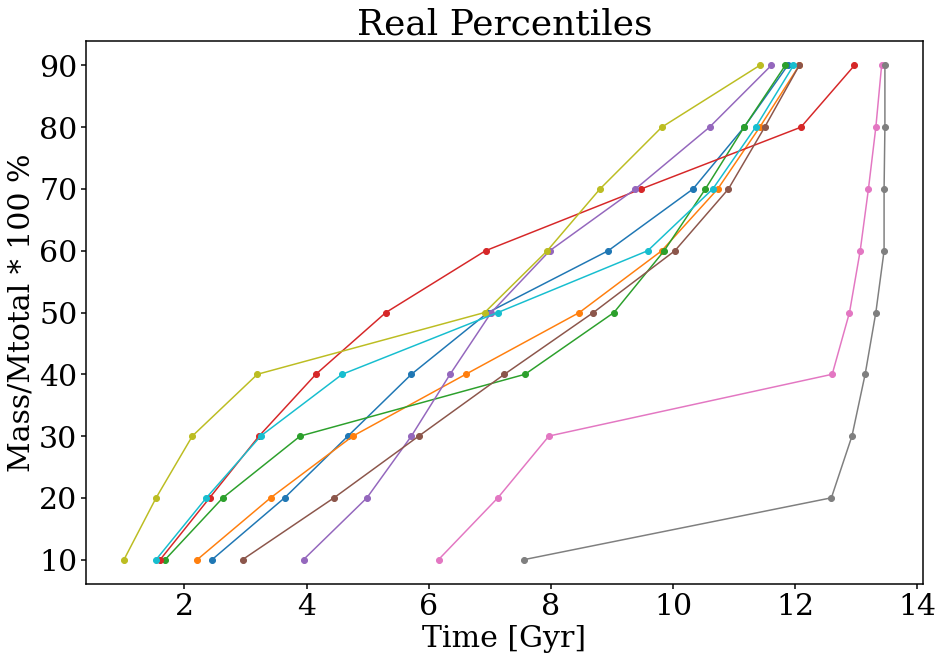

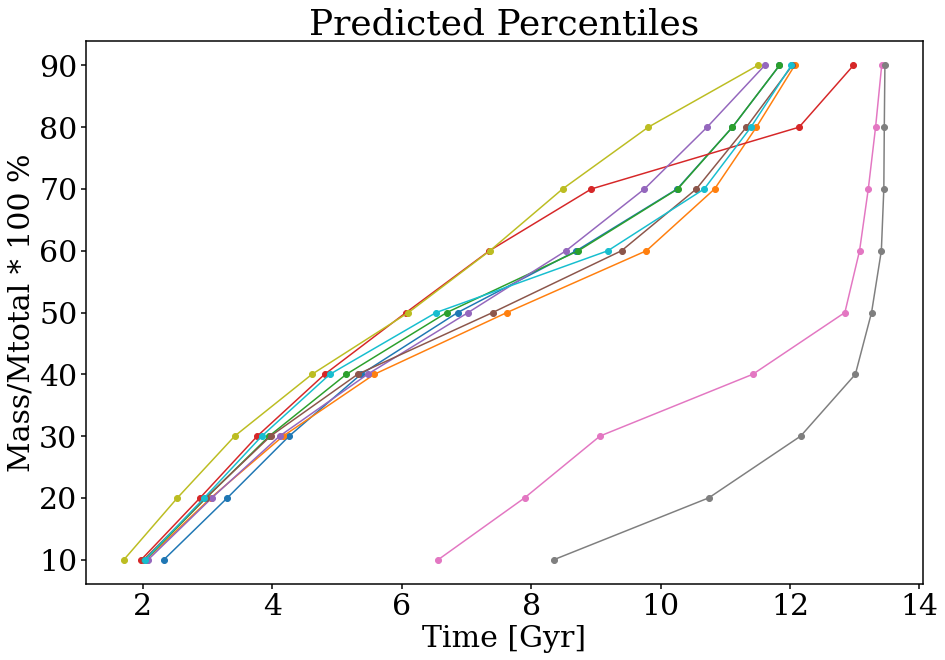

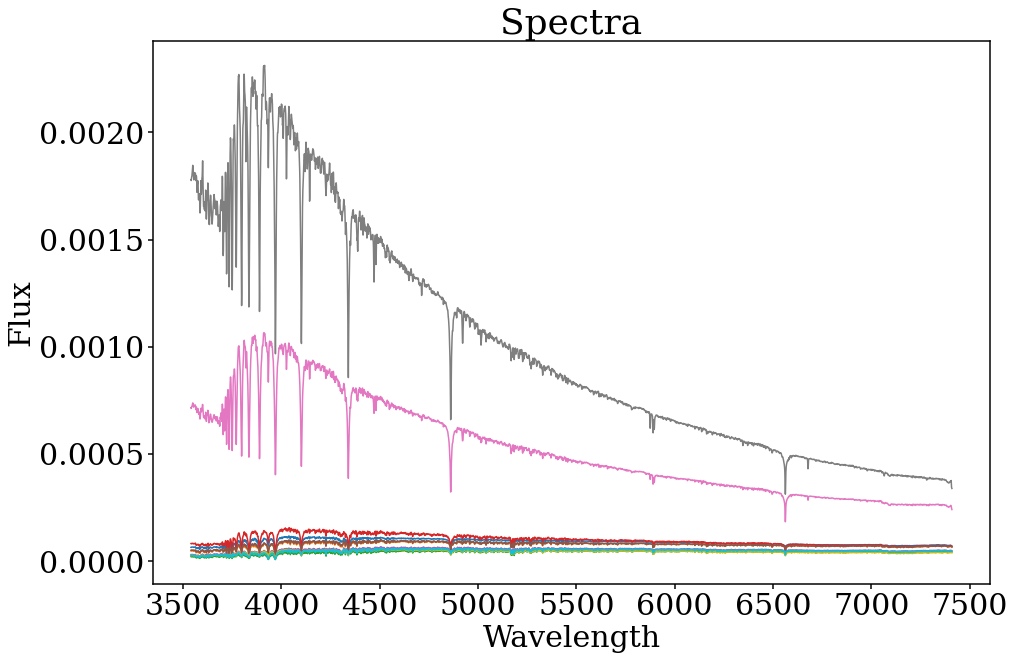

In [5]:
for i in np.arange(10): 
    plt.plot(y_sh[i,:9],np.arange(10,100,10),'-o')
plt.title('Real Percentiles') 
plt.xlabel('Time [Gyr]')
plt.ylabel('Mass/Mtotal * 100 %')
plt.show()

for i in np.arange(10): 
    plt.plot(means_sh[i,:9],np.arange(10,100,10),'-o')
plt.title('Predicted Percentiles') 
plt.xlabel('Time [Gyr]')
plt.ylabel('Mass/Mtotal * 100 %')
plt.show()

for i in np.arange(10): #really 100.000 examples
    plt.plot(wave,seds_real_sh[i,:])
plt.title('Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()

Let's get from the real percentiles the sfh

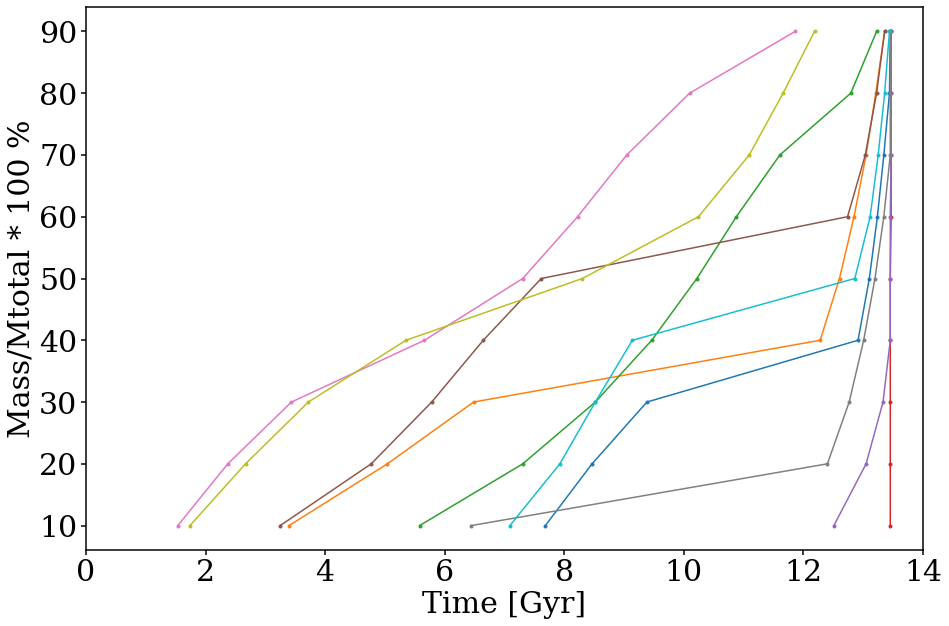

0.01348046441147335


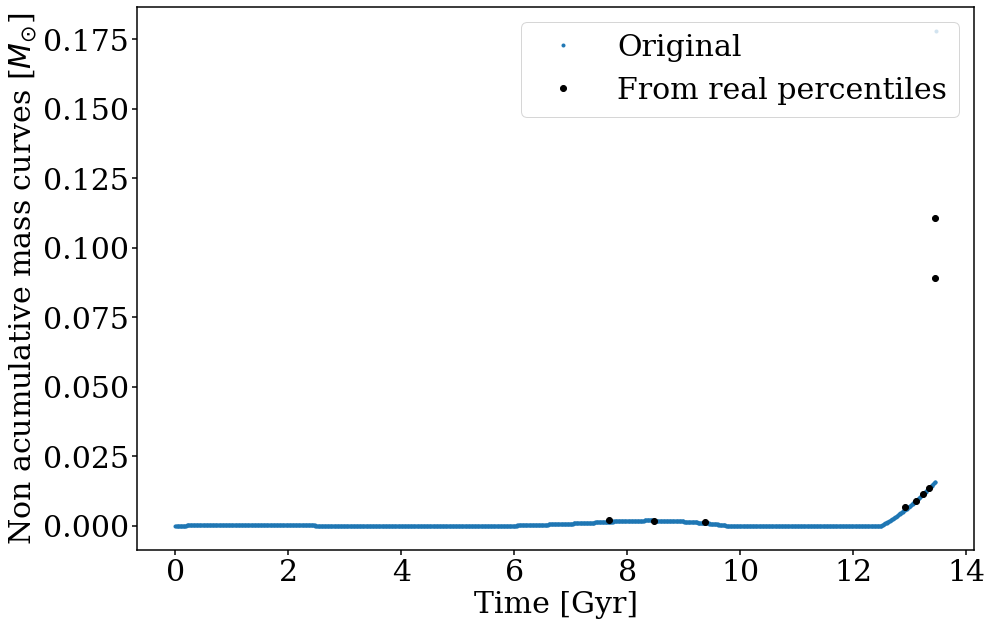

No handles with labels found to put in legend.


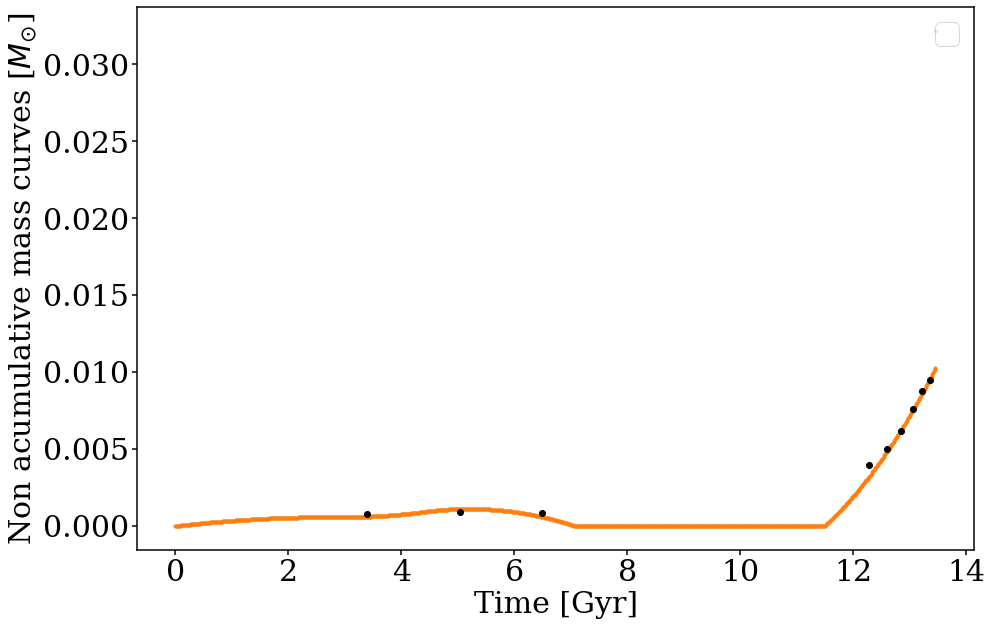

No handles with labels found to put in legend.


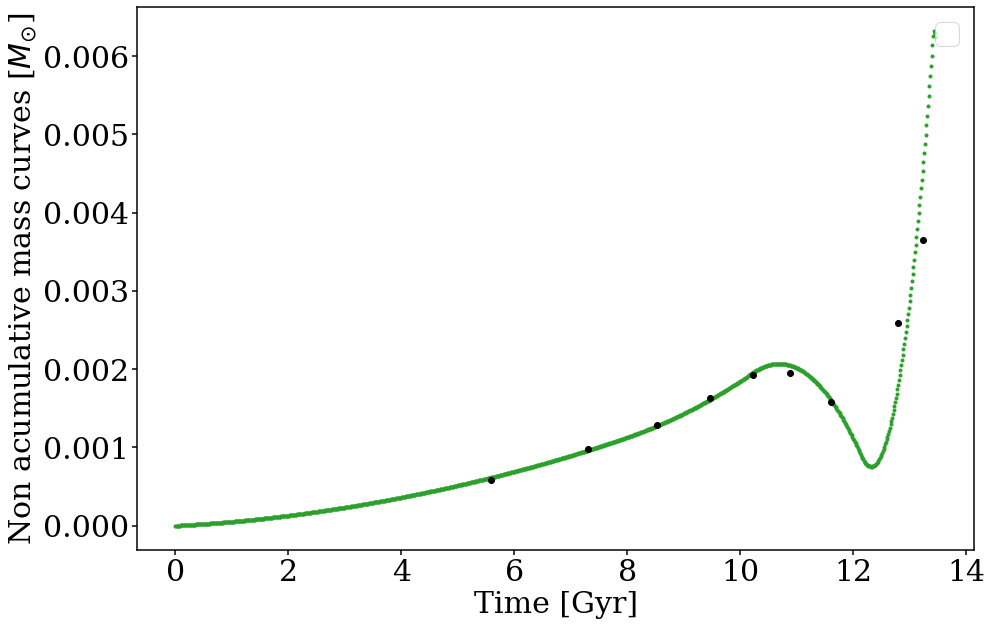

/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1215: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1215: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1216: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1216: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1217: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1217: RuntimeWarning: invalid value encountered in true_di

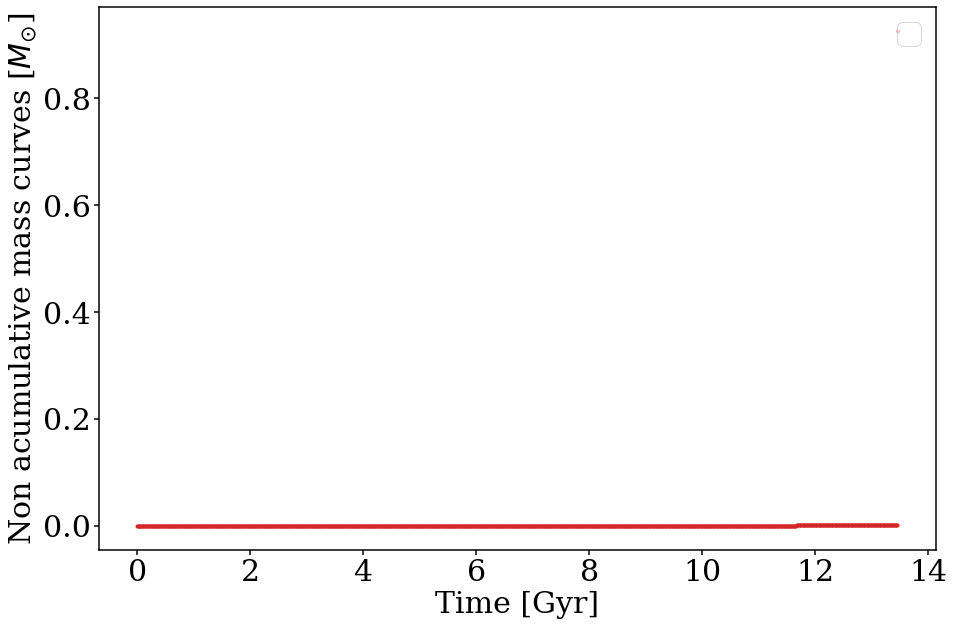

/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1215: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1215: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1216: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1216: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1217: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1217: RuntimeWarning: invalid value encountered in true_di

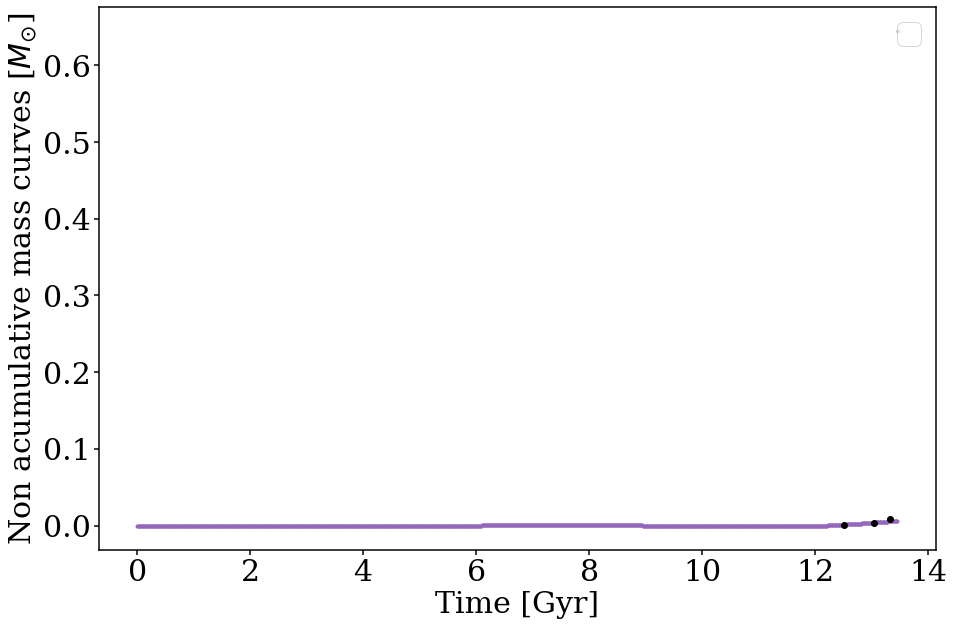

No handles with labels found to put in legend.


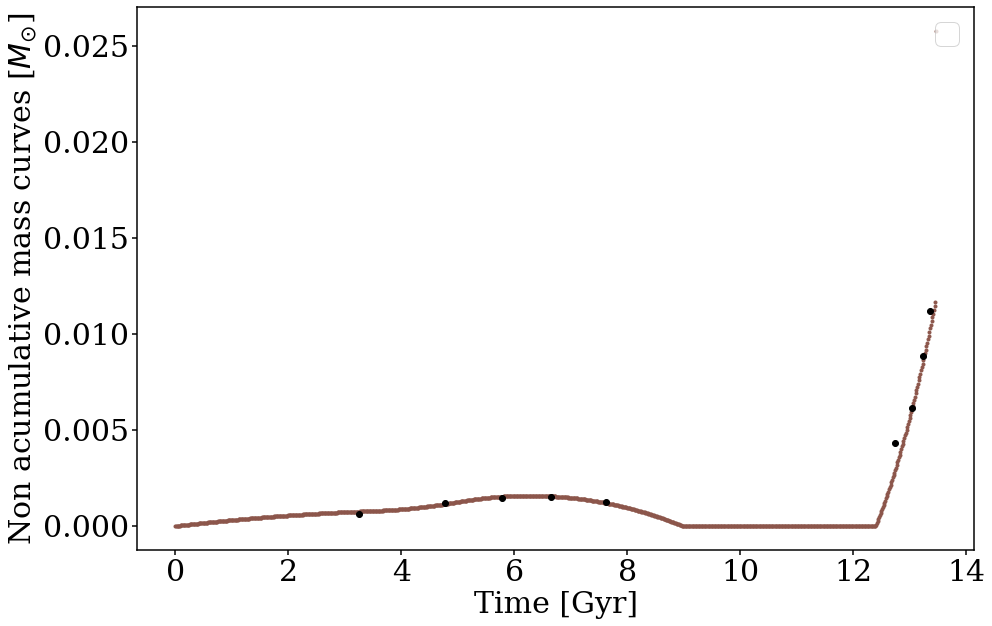

No handles with labels found to put in legend.


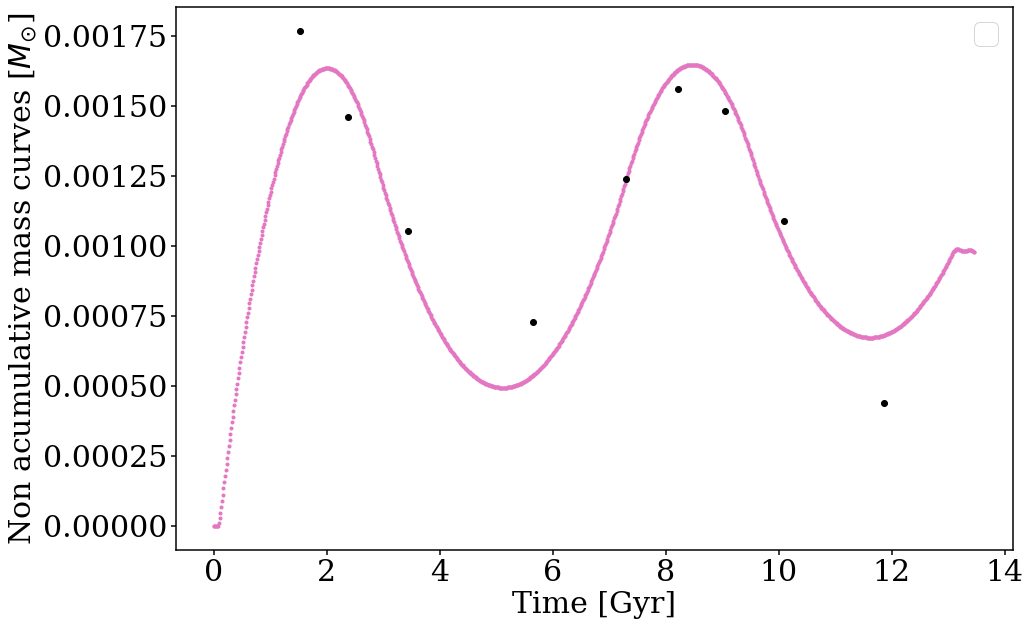

/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1215: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1216: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1217: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1223: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1271: RuntimeWarning: divide by zero encountered in double_scalars
  a = (dx2) / (dx1 * (dx1 + dx2))
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:127

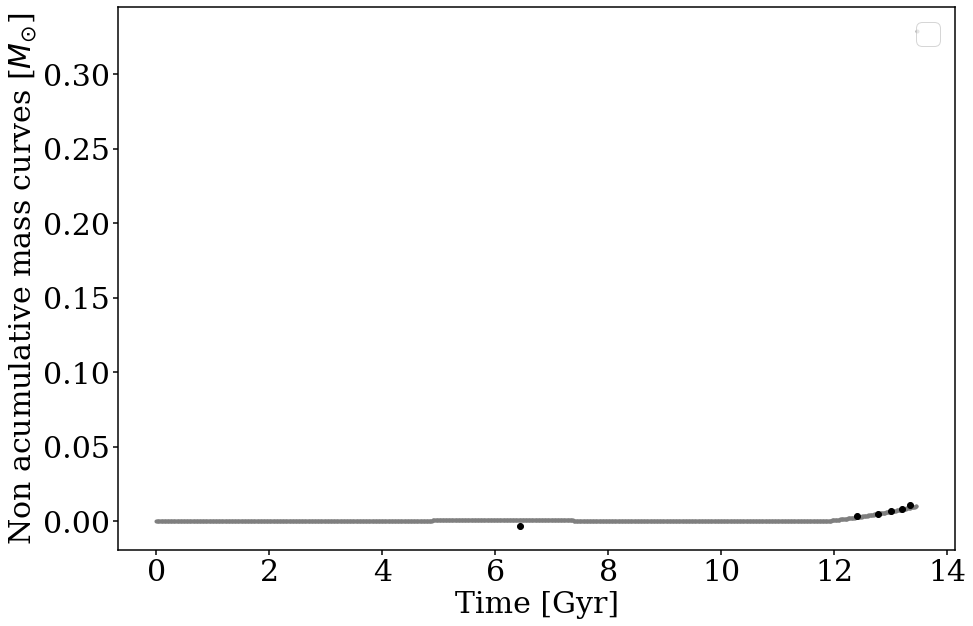

No handles with labels found to put in legend.


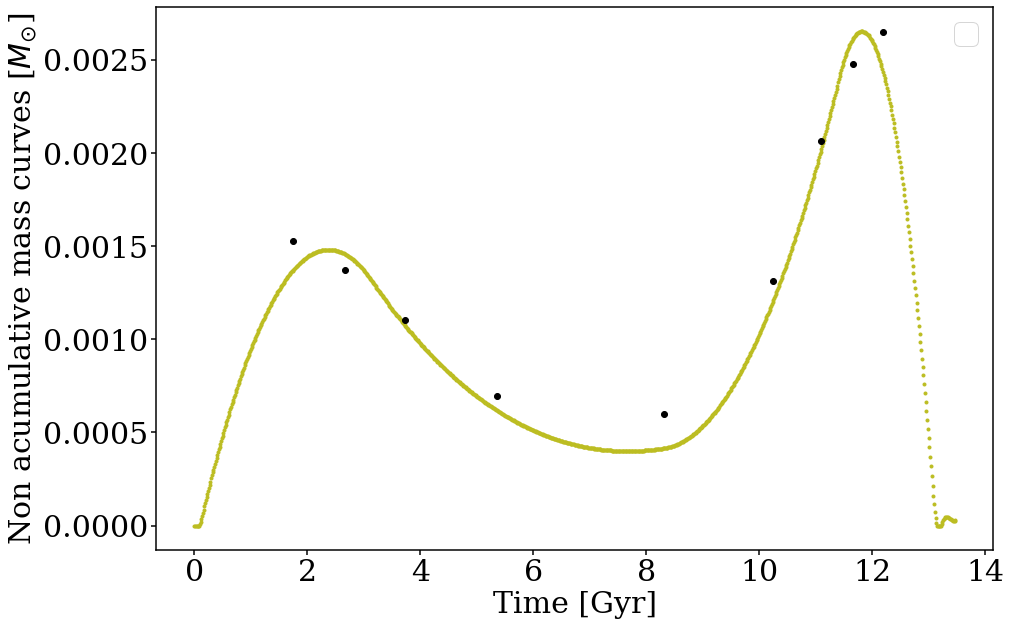

No handles with labels found to put in legend.


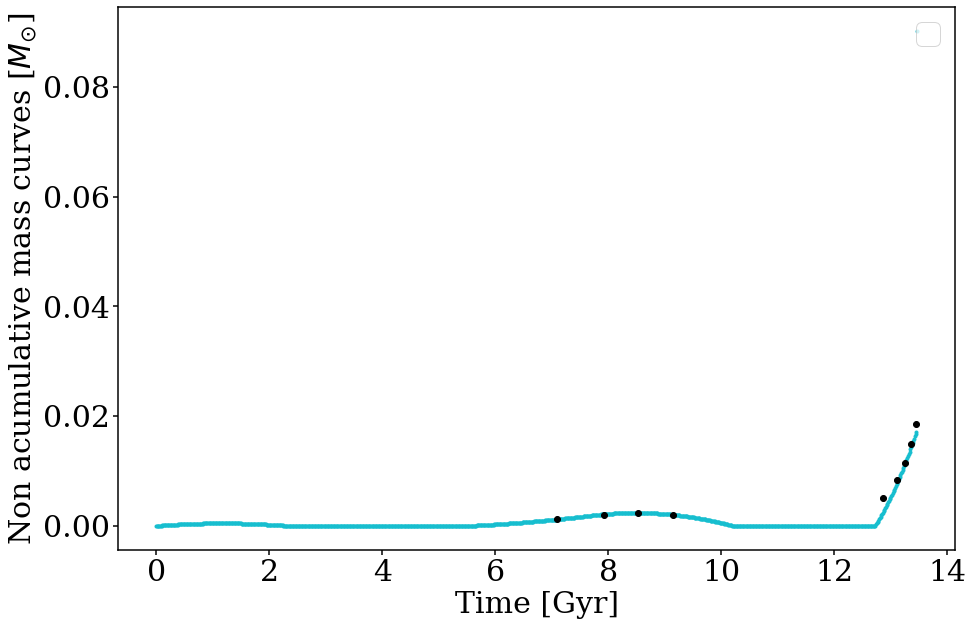

  0%|                                                  | 0/1000 [00:00<?, ?it/s]/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1215: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1216: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1217: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1223: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/opt/python/python3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:1239: RuntimeWarning: divide by zero encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(sl

In [7]:
index_list=np.random.randint(0,1000,10)



#show percentiles
for k,i in enumerate(index_list):
    per=y_sh[i,:9]
    plt.plot(per[:],np.arange(10,100,10),'.-',color='C'+str(k))
plt.xlim(0,14)
plt.xlabel('Time [Gyr]')
plt.ylabel('Mass/Mtotal * 100 %')
plt.show()

delta_t=t[1]-t[0]
print(delta_t)
    
#show non accumulative mass curve (unit Msun)
for k,i in enumerate(index_list):
    per=y_sh[i,:9]
    ms=np.gradient(np.arange(0.1,1,0.1),per,edge_order=2)
    if k==0:
        plt.plot(t,ms_real_sh[i,:],'.',color='C'+str(k),label='Original')
        plt.plot(per,ms*delta_t,'o',color='k',label='From real percentiles')
    else:
        plt.plot(t,ms_real_sh[i,:],'.',color='C'+str(k))
        plt.plot(per,ms*delta_t,'o',color='k')
        
    
    plt.legend(loc='upper right')
    plt.xlabel('Time [Gyr]')
    plt.ylabel('Non acumulative mass curves [$M_{\\odot}$]')
    plt.show()
    
    

#save non accumulative mass curves obtained from real percentiles 

ms_from_percentiles=[]
for i in trange(1000):
    per=y_sh[i,:9]
    ms=np.gradient(np.arange(0.1,1,0.1),per) #unit Msun/gyr
    ms_from_percentiles.append(ms*delta_t) #unit Msun
ms_from_percentiles=np.array(ms_from_percentiles)
    

In [8]:
#generate input functions

import dense_basis as db


def generate_weights_from_SFHs_non_param(n,logMstar=10.0,z=0.0,percen=True):
    priors = db.Priors()
    curves=[]
    times=[] #not needed because if we fix z all rand_time are exactly the same
    for i in range(n):
        rand_sfh_tuple=priors.sample_sfh_tuple()
        rand_sfh_tuple[0]=logMstar #logMstar at selected z (in this case z=0)
        rand_sfh, rand_time = db.tuple_to_sfh(rand_sfh_tuple, zval = z) 
        curves.append(rand_sfh*1e-9) #conversion from Msun/yr to Msun/Gyr
        times.append(rand_time)
    
    ms=[]
    #non accumulative mass curves, we save it cause we will use it later
    for index,curve in enumerate(curves):        
        sfr_0=curve
        m=[]
        t=times[index]
        step=t[1]-t[0]
        for i,tx in enumerate(t):  
             m_t=sfr_0[i]*step #this gives directly the mass curve (non accumulative)
             m.append(m_t)
        ms.append(m/np.sum(m)) #normalized (weigths!!)

    if percen:
        #compute percentiles
        percentiles=[]
        for i,curve in enumerate(curves):
             mcurve=ms[i]
             m=[]
             percent=[]
             for j in range(len(mcurve)):
                m.append(np.sum(mcurve[:j+1]))
             for k in range(1,10):
                ind=np.argmin(abs(np.array(m)-k/10))
                percent.append(t[ind])
             percentiles.append(percent)  
        return np.array(times),np.array(ms),np.array(percentiles)
    else:
        return np.array(times),np.array(ms)


def get_tbins(dir_name,strs_1,strs_2):
    library=os.listdir(dir_name)
    x,y=len(strs_1),len(strs_2)
    lib=[]
    lib_n=[]
    for i,j in enumerate(library):
        if j[:x]==strs_1:
            lib.append(j[x:y+1])
            lib_n.append(float(j[x:y+1]))     
    lib_n=np.array(sorted(lib_n))
    return lib_n

def get_metallicities(dir_name,strs_1,strs_2):
    library=os.listdir(dir_name)
    x,y=len(strs_1),len(strs_2)
    lib_n=[]
    names=[]
    for i,j in enumerate(library):
        if j[:x]==strs_1 and j[-y:]==strs_2:
            if j[x:y+1][0]=='m':
              lib_n.append(-float(j[x:-y][1:])) 
            elif j[x:y+1][0]=='p':
              lib_n.append(+float(j[x:-y][1:]))
            names.append(j)
            
    ind_sort=np.argsort(lib_n)
    names=np.array(names)[ind_sort]
    lib_n=np.array(lib_n)[ind_sort]
    return names,lib_n


def get_data(dir_name,strs_1,strs_2):
    library=os.listdir(dir_name)
    x,y=len(strs_1),len(strs_2)
    lib=[]
    lib_n=[]
    for i,j in enumerate(library):
        if j[:x]==strs_1:
            lib.append(j[x:y+1])
            lib_n.append(float(j[x:y+1]))
        
    lib_n=np.array(lib_n)
    data=[]
    
    for j in range(len(lib_n)):
        globals() ['hdul'+str(j)]=fits.open(dir_name+'/'+strs_1+lib[j]+strs_2)
        data.append(np.array(globals()['hdul'+str(j)][0].data))

    hdr=hdul0[0].header
    wave = hdr['CRVAL1'] + np.arange(hdr['NAXIS1'])*hdr['CDELT1']
    
    ind_sorted=np.argsort(lib_n)
    data=np.array(data,ndmin=2)
    data=data[ind_sorted,:]
    lib_n=lib_n[ind_sorted]
    return wave,data


def get_data_met_alpha(dir_name,z=np.arange(-2.3,0.6,0.2),alpha_fe=[0,0.2,0.4]):

    data_met_alpha=np.zeros((53,4300,len(z),2))

    for p,a in enumerate(['0.00','0.40']):
        names,metallicity_bins=get_metallicities(dir_name+'_Ep'+a,strs_1='Mku1.30Z',strs_2='T00.0300_iTp'+a+'_Ep'+a+'.fits')
        data_metallicities=[]
        
        for k,n in enumerate(names):
            wave,data=get_data(dir_name+'_Ep'+a,n[:14],'_iTp'+a+'_Ep'+a+'.fits')
            data_metallicities.append(data)

        data_met=np.zeros((53,4300,len(metallicity_bins)))
        
        for i in range(len(metallicity_bins)):
            data_met[:,:,i]=data_metallicities[i]
        
        data_extended_met=interpolate_z(metallicity_bins,z,data_met)

        data_met_alpha[:,:,:,p]=data_extended_met
     
       
    data_extended_met_alpha=interpolate_alpha([0,0.4],alpha_fe,data_met_alpha)
    
    return wave,data_extended_met_alpha


def get_data_met_alpha_single(dir_name,z,alpha_fe):

    data_met_alpha=np.zeros((53,4300))

    for p,a in enumerate(['0.00','0.40']):
        names,metallicity_bins=get_metallicities(dir_name+'_Ep'+a,strs_1='Mku1.30Z',strs_2='T00.0300_iTp'+a+'_Ep'+a+'.fits')
        data_metallicities=[]
        
        for k,n in enumerate(names):
            wave,data=get_data(dir_name+'_Ep'+a,n[:14],'_iTp'+a+'_Ep'+a+'.fits')
            data_metallicities.append(data)

        data_met=np.zeros((53,4300,len(metallicity_bins)))
        
        for i in range(len(metallicity_bins)):
            data_met[:,:,i]=data_metallicities[i]
        
        data_extended_met=interpolate_z(metallicity_bins,z,data_met,single=True)

        data_met_alpha[:,:]=data_extended_met
     
       
    data_extended_met_alpha=interpolate_alpha([0,0.4],alpha_fe,data_met_alpha,single=True)
    
    return wave,data_extended_met_alpha

def interpolate_z(metallicity_bins,z,data, single=False):
    #(53,4300,28)

    if single:
        data_extended=np.zeros((len(data[:,0,0]),len(data[0,:,0]) ))
        for i in range(len(data[:,0])):
            for j in range(len(data[0,:])):
                x=np.interp(z,metallicity_bins,data[i,j])
                data_extended[i,j]=x
        
        
    else:
        data_extended=np.zeros((len(data[:,0,0]),len(data[0,:,0]),len(z) ))
        for i in range(len(data[:,0,0])):
            for j in range(len(data[0,:,0])):
                x=np.interp(z,metallicity_bins,data[i,j,:])
                data_extended[i,j,:]=x
    return data_extended

def interpolate_alpha(alpha_bins,alpha,data, single=False):
    #(53,4300,14,3)
    
    if single:
        data_extended=np.zeros((len(data[:,0]),len(data[0,:])))
        for i in range(len(data[:,0])):
            for j in range(len(data[0,:])):
                 x=np.interp(alpha,alpha_bins,data[i,j])
                 data_extended[i,j]=x
                
    else: 
        data_extended=np.zeros((len(data[:,0,0,0]),len(data[0,:,0,0]),len(data[0,0,:,0]),len(alpha)))
        for i in range(len(data[:,0,0,0])):
            for j in range(len(data[0,:,0,0])):
                for k in range(len(data[0,0,:,0])):
                     x=np.interp(alpha,alpha_bins,data[i,j,k,:])
                     data_extended[i,j,k,:]=x
    
    return data_extended


def interpolate_t(tbins,t,data):
    data_extended=np.zeros((len(t),len(data[0,:])))
    for i in range(4300):
        x=np.interp(t,tbins,data[:,i])
        data_extended[:,i]=x
    return data_extended


def create_spectrum(t,m,wave,data): #only for a galaxy at a time
    spectrum=[]
    for l in range(len(t)):  #we append older first
        spectrum.append(m[l]*data[-l]) #multiply by the weights
    #data is not normalized, we do not normalize the flux
    spectrum=np.array(spectrum)
    sed=np.sum(spectrum,axis=0) #we add the terms of the linear combination
    return wave,sed

def generate_all_spectra(t,ms,wave,data_extended):
    seds=[]
    for m in ms[:]:
        wave,sed=create_spectrum(t,m,wave,data_extended)
        seds.append(sed)
    return wave,seds

def plot_sed_sfh(ms,t,wave,seds,n_int):
    for i,sed in enumerate(seds[::n_int]):
        plt.plot(wave,sed,alpha=0.7)
    plt.xlabel('Wavelenght [$\\AA$]')
    plt.title('Artificial spectrum')    
    plt.show()
    t_back=t[::-1]
    for i,m in enumerate(ms[::n_int]):
       plt.plot(t_back,m,'-')

    plt.xlim(14,0)
    plt.xlabel('Lookback time [Gyr]')
    plt.title('Mstar norm non acummulative')
    plt.show()



Starting dense_basis. Failed to load FSPS, only GP-SFH module will be available.


In [ ]:
#small check

"""t,m,p=generate_weights_from_SFHs_non_param(1)
mp=np.gradient(np.arange(0.1,1,0.1),p[0],edge_order=2)

plt.plot(t[0],m[0])

for i in range(9):
    if i==0:
        plt.plot(p[0][i],mp[i]*delta_t,'ko')
    else:
        plt.plot(p[0][i],mp[i]*delta_t,'ko')
#plt.plot(p[0],mp*delta_t,'ko')
plt.show()


#esta gráfica nos verifica que los percentiles están bien computados
for i in range(len(t[0])):
    if i==0:
        plt.plot(t[0][i],m[0][i],'.')
    else:
        plt.plot(t[0][i],np.sum(m[0][:i]),'.',c='tab:blue')
plt.plot(p[0],np.arange(0.1,1.0,0.1),'ko')
plt.show()

#print(t)
#print(np.sum(m))
#print(p)"""

In [ ]:
#save non accumulative mass curves obtained from predicted percentiles 

ms_from_percentiles_pred=[]
for i in trange(1000):
    per=means_sh[i,:9]
    ms=np.gradient(np.arange(0.1,1,0.1),per) #unit Msun/gyr
    ms_from_percentiles_pred.append(ms*delta_t) #unit Msun
ms_from_percentiles_pred=np.array(ms_from_percentiles_pred)



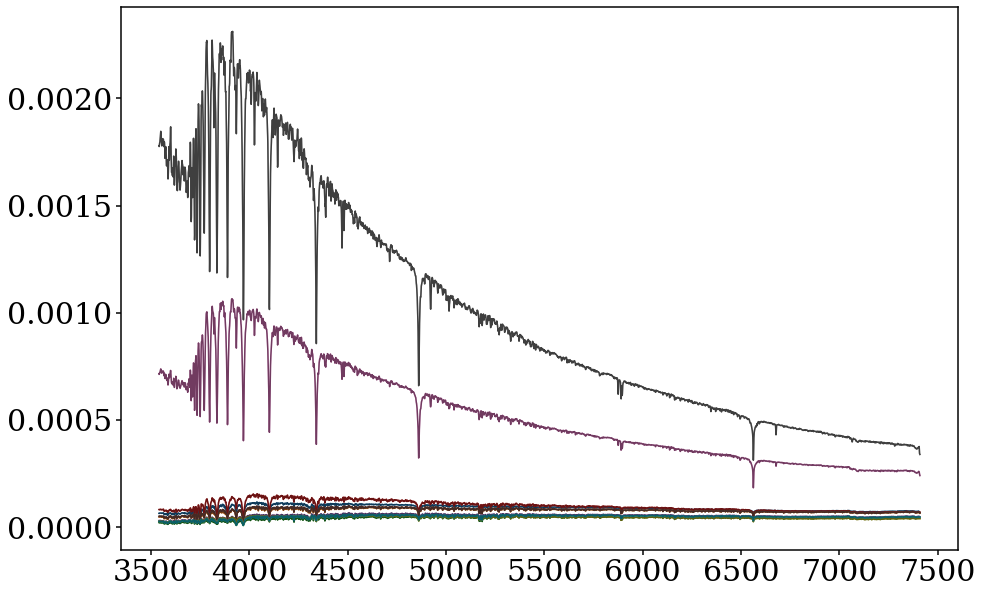

13.466983947061877


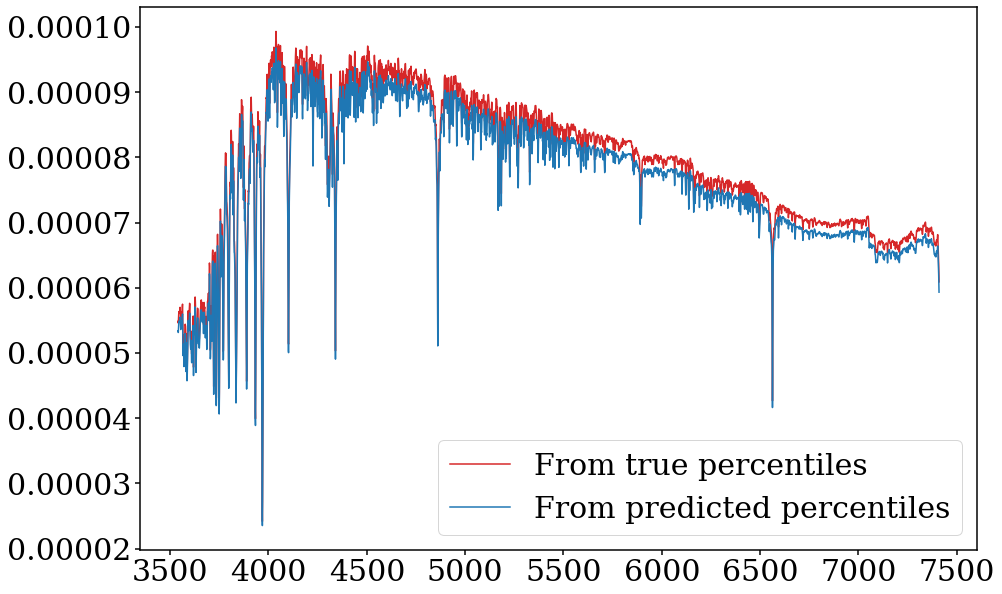

13.466983947061877


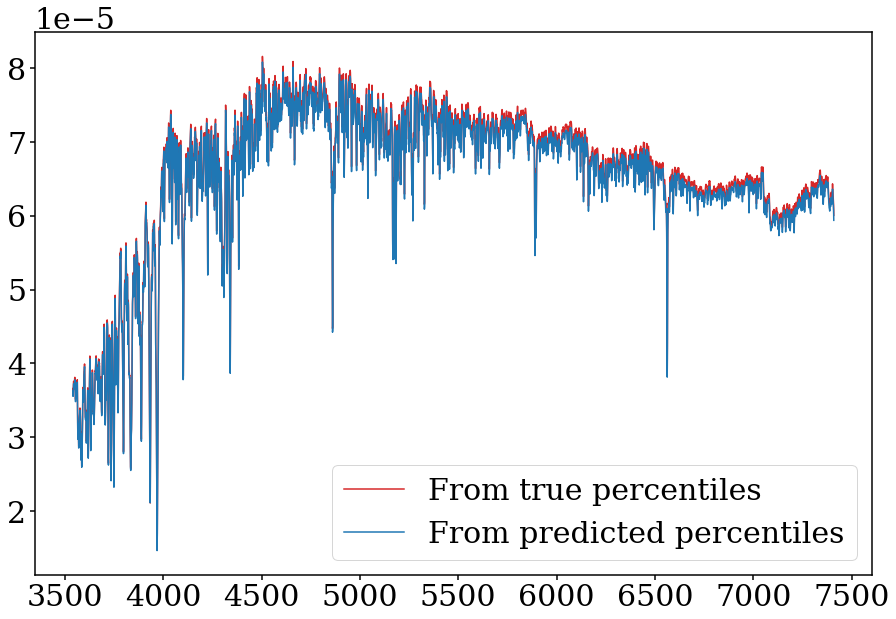

13.466983947061877


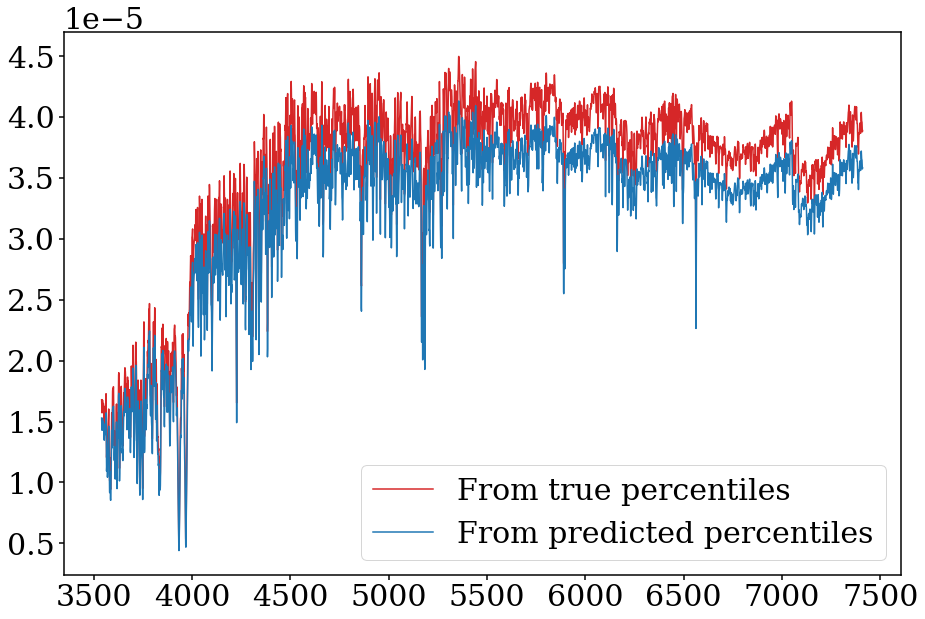

13.466983947061877


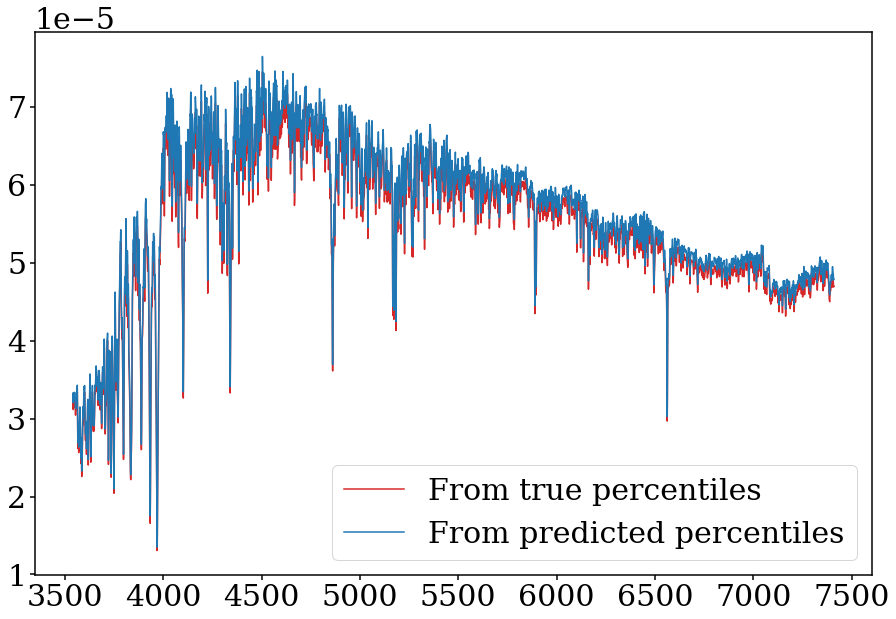

13.466983947061877


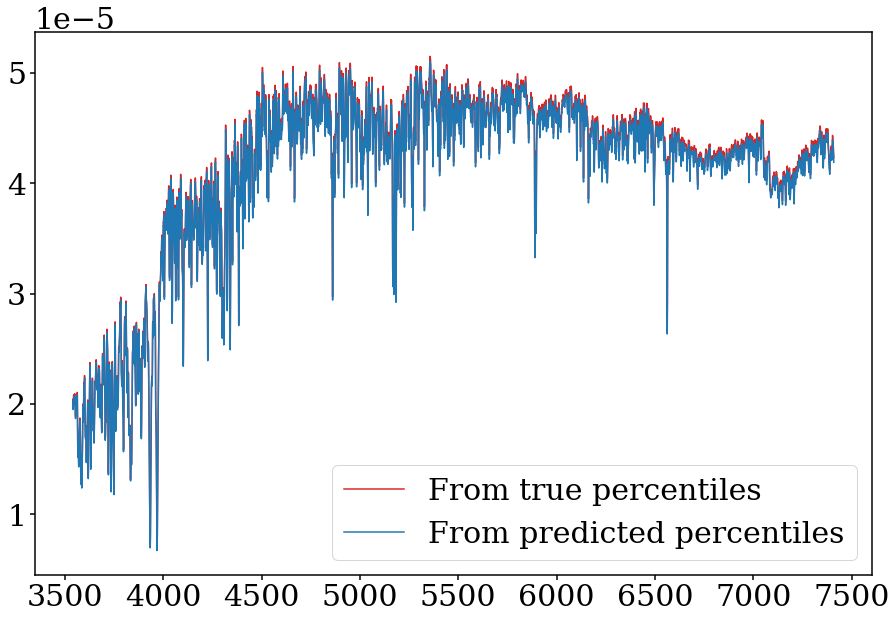

13.466983947061877


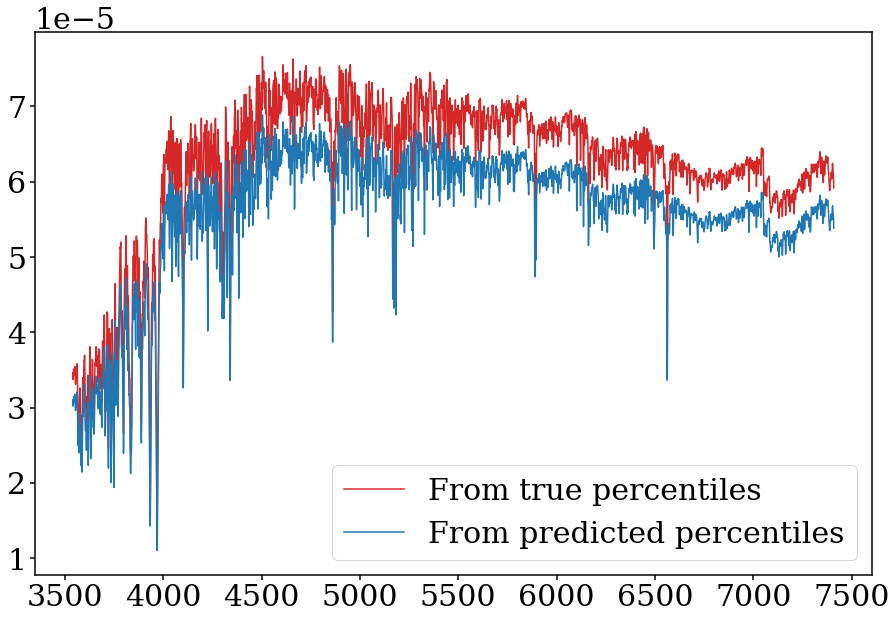

13.466983947061877


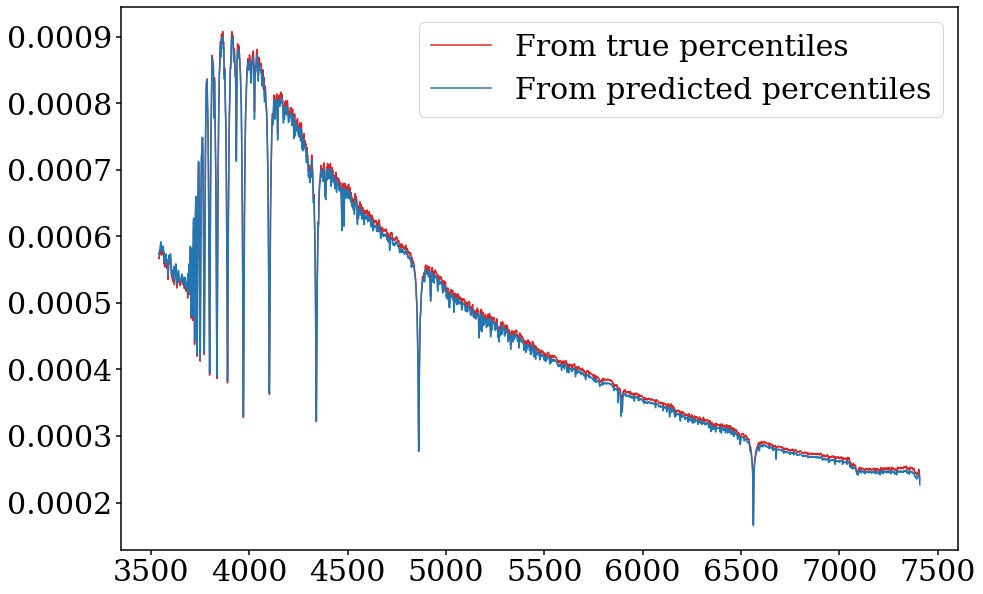

13.466983947061877


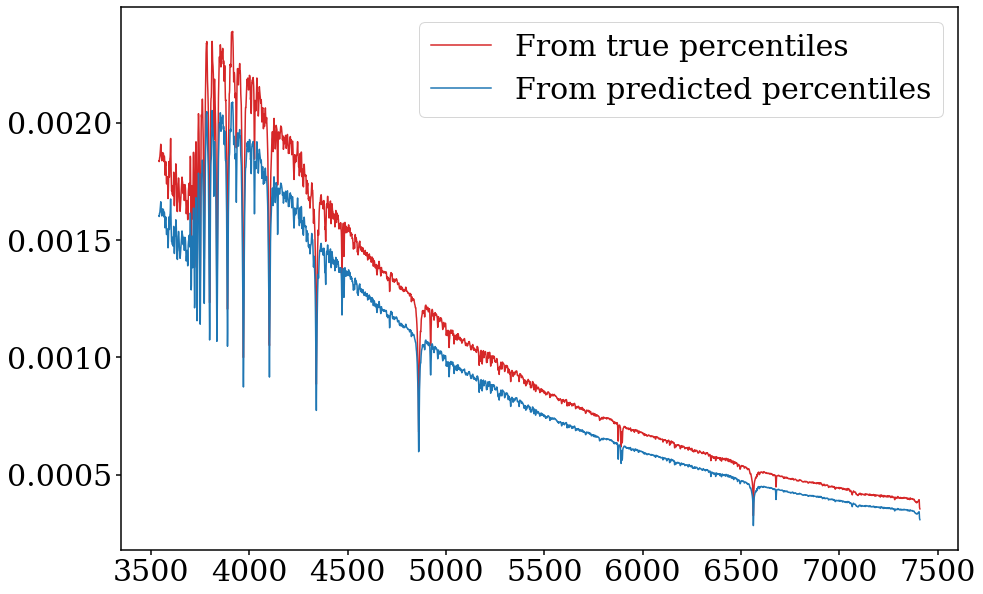

13.466983947061877


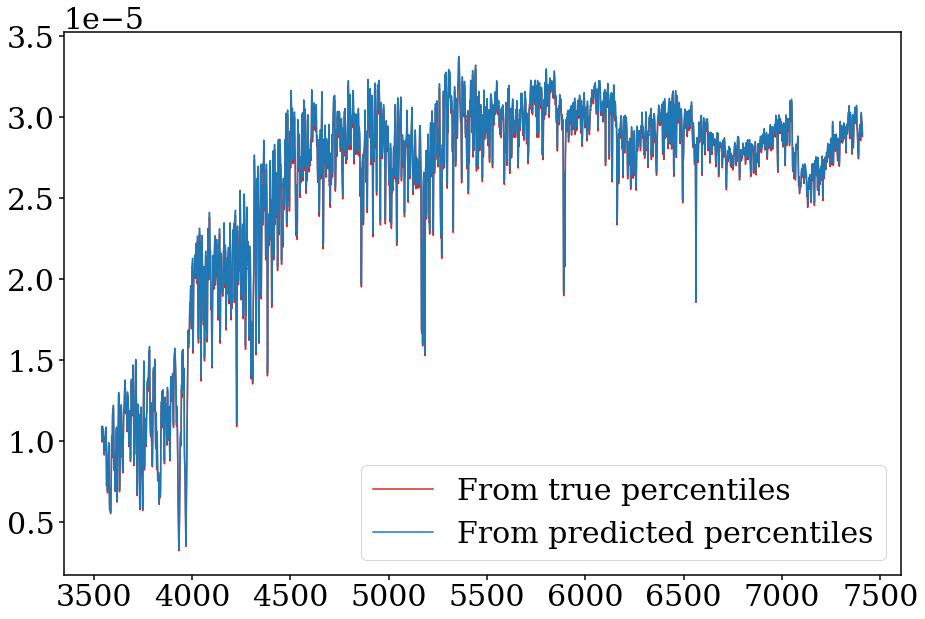

13.466983947061877


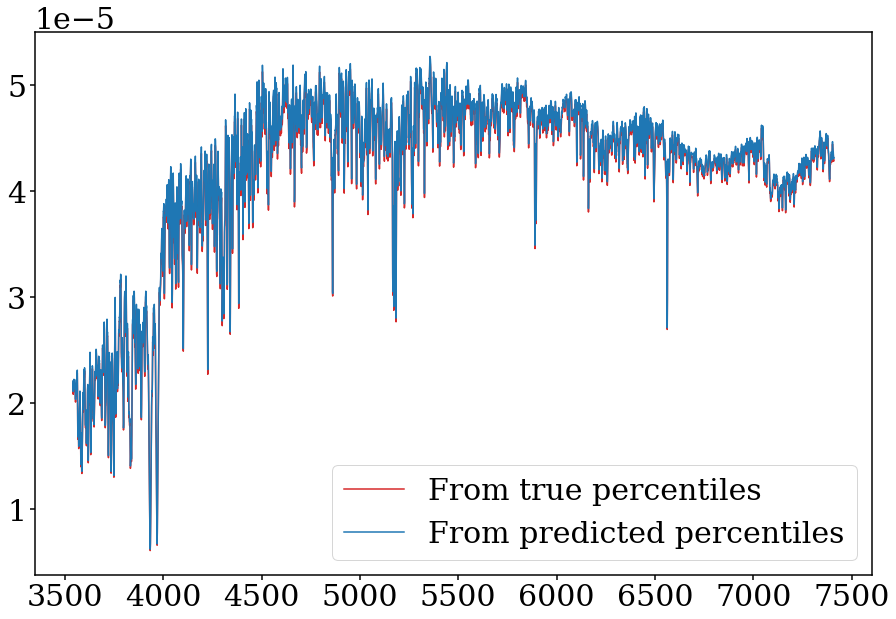

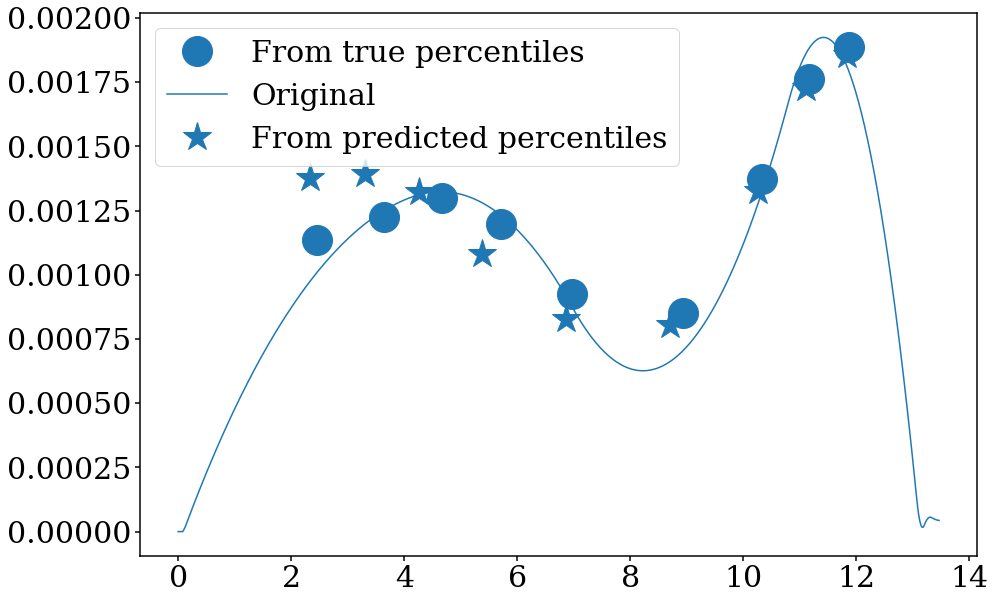

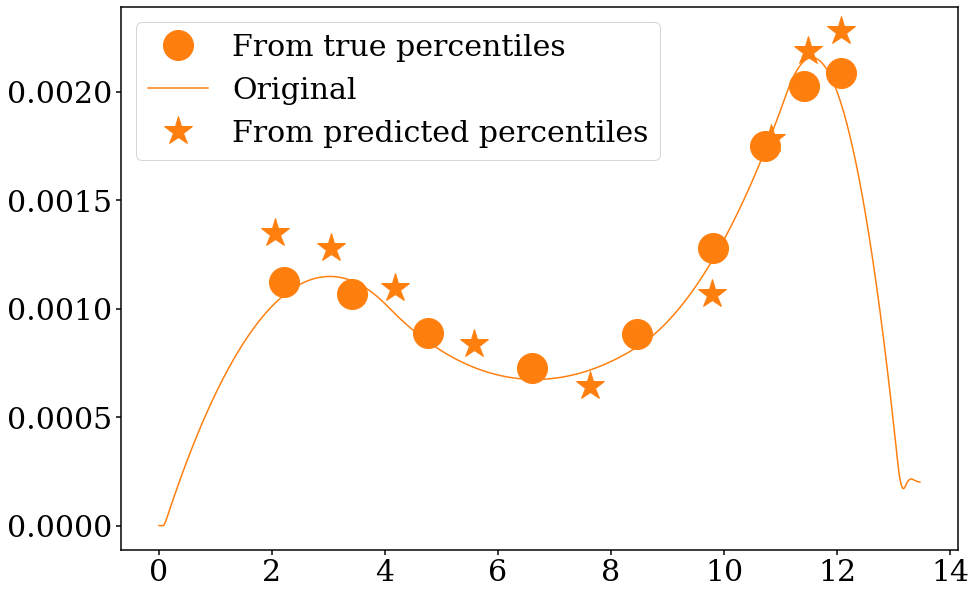

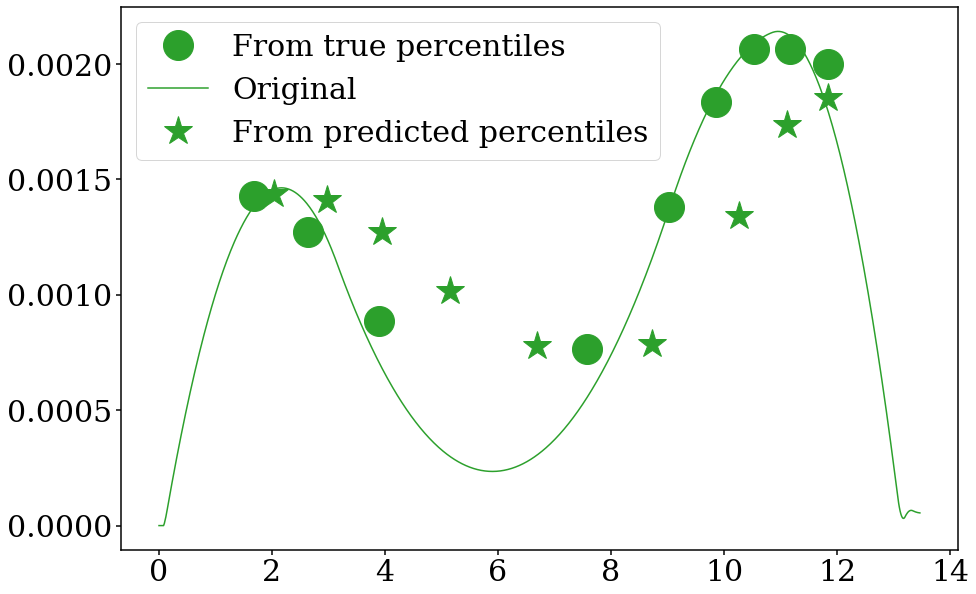

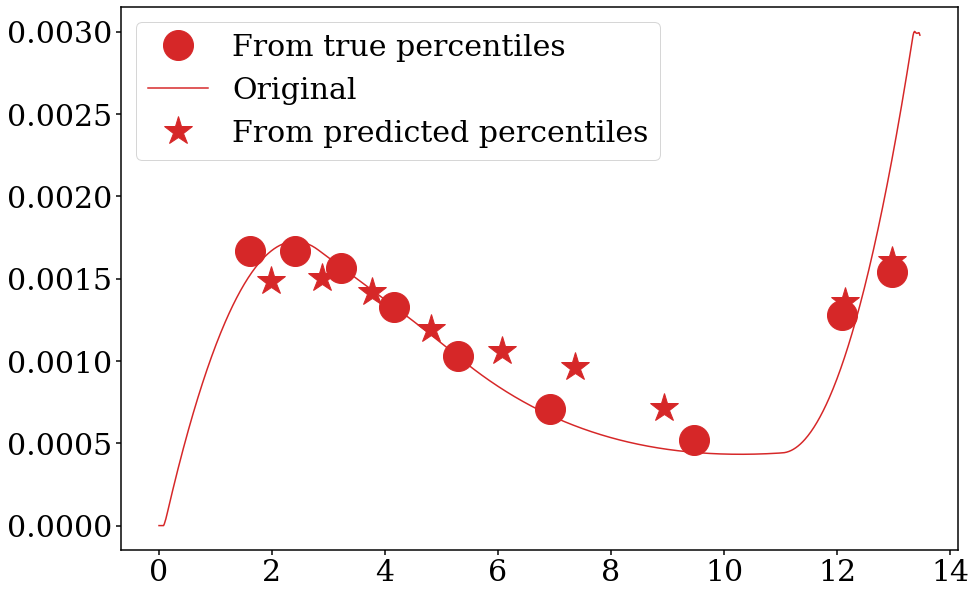

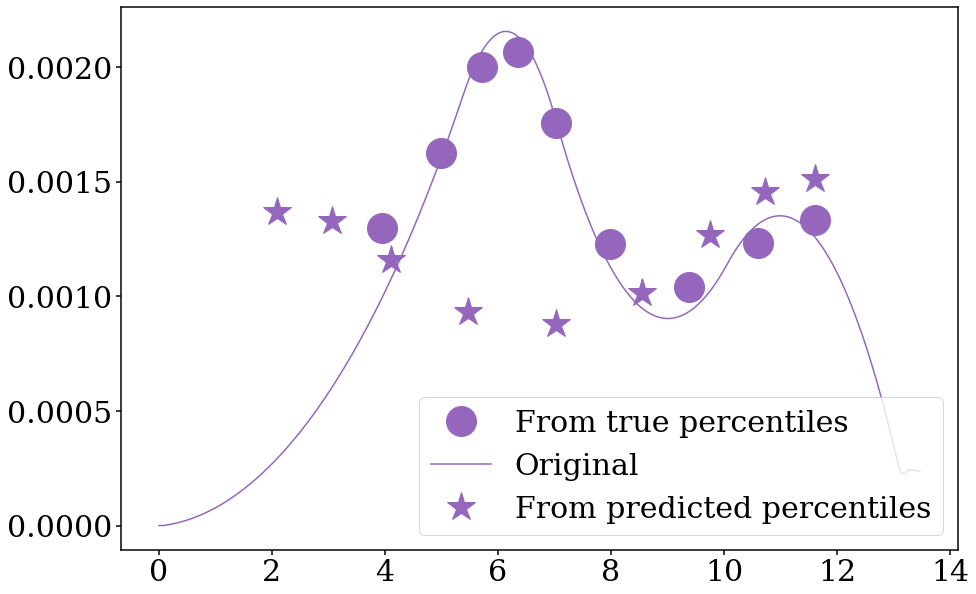

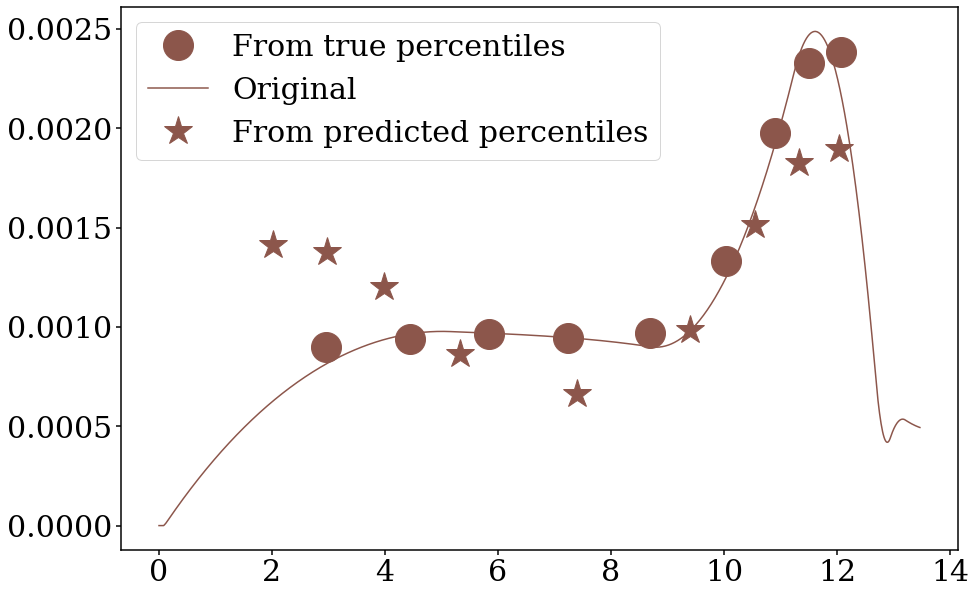

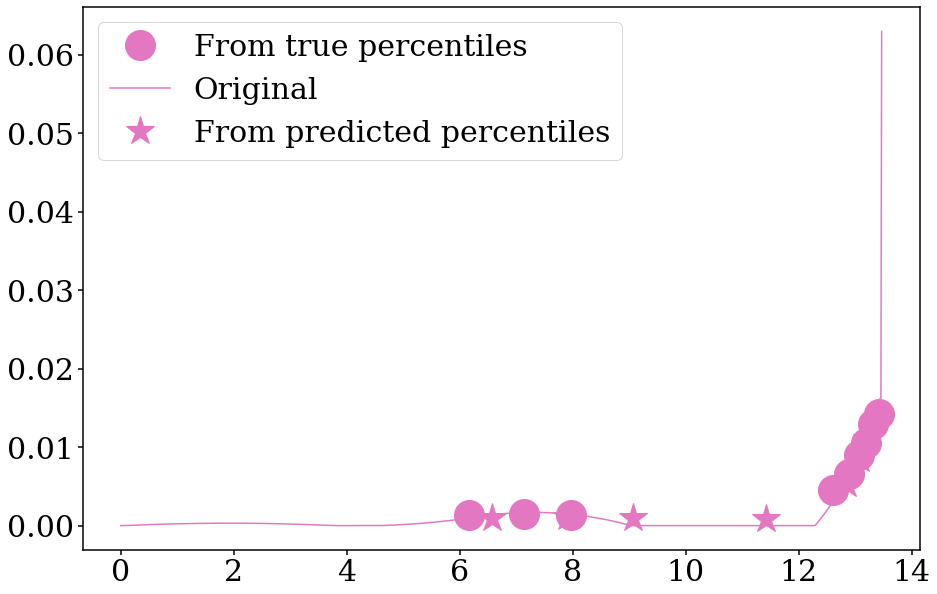

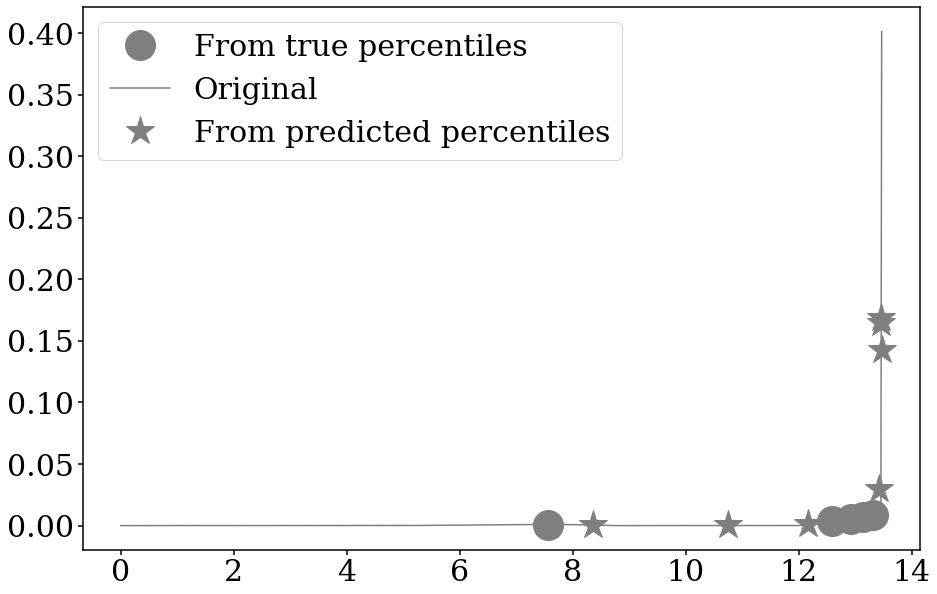

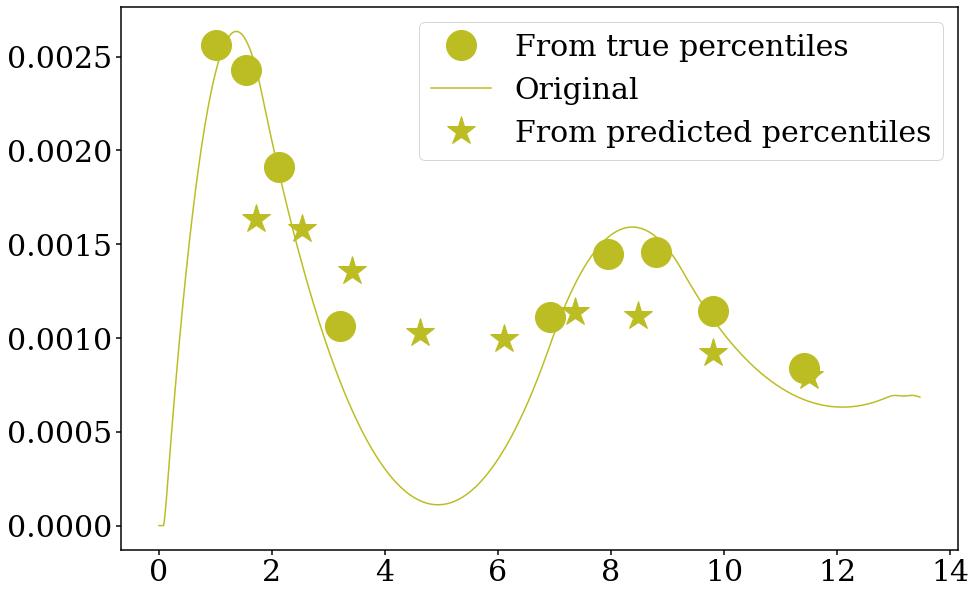

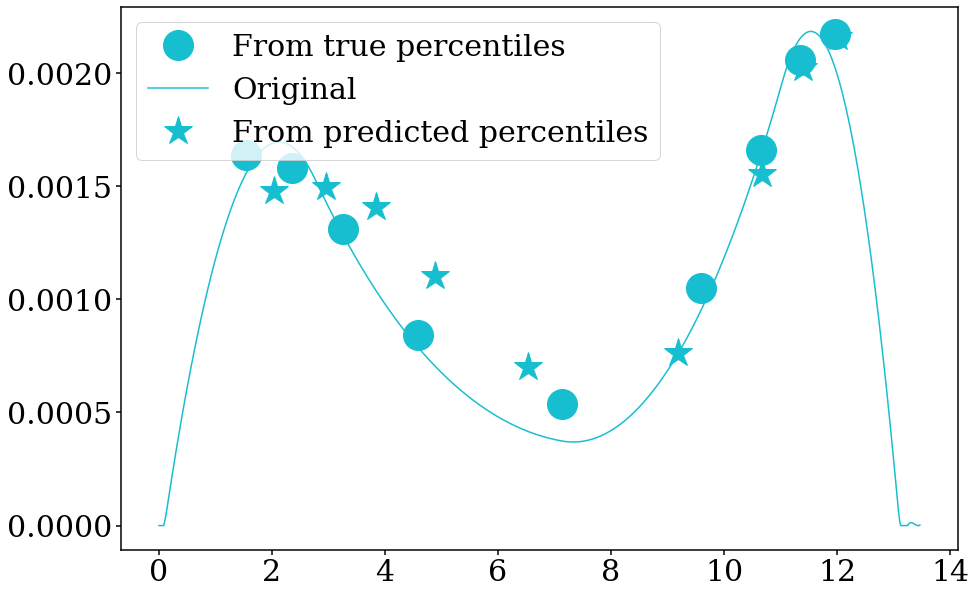

In [32]:

#get spectra with less sfh points

#by the moment we avoid the z and alpha/fe estimation. We use the real values to generate the spectra

#try with 2 spectra (better than one because the module is prepared for a list of
#z and alpha_fe)
z=y_sh[:10,-2]
alpha_fe=y_sh[:10,-1]
tbins=get_tbins(dir_name='../../MILES/MILES_BASTI_KU_baseFe',strs_1='Mku1.30Zp0.06T',strs_2='_iTp0.00_baseFe.fits')
wave,data_met_alpha=get_data_met_alpha(dir_name='../../MILES/MILES_BASTI_KU',z=z,alpha_fe=alpha_fe)

data=[]
for i in range(10):
    data.append(data_met_alpha[:,:,i,i])


#print(z,alpha_fe)
 
#just to check we do it well with all the sfh, perfect as we see
seds_from_percent=[]
for i in range(10):
    data_extended=interpolate_t(tbins,t,data[i])
    w,sed_from_percent=create_spectrum(t,ms_real_sh[i,:],wave,data_extended)
    #print(np.sum(ms_real_sh[i,:]))
    seds_from_percent.append(sed_from_percent)
    plt.plot(w,sed_from_percent,c='C'+str(i))
    plt.plot(w,seds_real_sh[i,:],'k',alpha=0.5)
plt.show()

#now the actual task
#when deltat is fixed is it ok to do m[-i] and thats all
#but what happens when delta t is not fixed (percentiles)
seds_from_percent=[]
seds_from_percent_pred=[]

for i in range(10):
    
    #real percentiles
    ms=ms_from_percentiles[i,:]
    #notice we need to interpolate using lookback time (MILES)
    #t[-1] is the age of the universe
    print(t[-1])
    data_extended=interpolate_t(tbins,t[-1]-y_sh[i,:9],data[i])
    spectrum=[]
    
    for l in range(9):  #we append older first
        #spectrum.append(ms[l]/np.sum(ms) * data_extended[-l] ) #multiply by the weights
        spectrum.append(((1/9)*data_extended[-l]))
    #data is not normalized, we do not normalize the flux
    spectrum=np.array(spectrum)
    sed_from_percent=np.sum(spectrum,axis=0) #we add the terms of the linear combination
    seds_from_percent.append(sed_from_percent)
    
    ms=ms_from_percentiles_pred[i,:]
    data_extended=interpolate_t(tbins,t[-1]-means_sh[i,:9],data[i])
    spectrum=[]
    for l in range(9):  #we append older first
        #spectrum.append(ms[l]/np.sum(ms) * data_extended[-l] ) #multiply by the weights
        spectrum.append(((1/9)*data_extended[-l]))
    #data is not normalized, we do not normalize the flux
    spectrum=np.array(spectrum)
    sed_from_percent_pred=np.sum(spectrum,axis=0) #we add the terms of the linear combination
    seds_from_percent_pred.append(sed_from_percent_pred)
    
    
    plt.plot(wave,sed_from_percent,label='From true percentiles',c='tab:red')
    plt.plot(wave,sed_from_percent_pred,label='From predicted percentiles',c='tab:blue')
    #plt.plot(wave,seds_real_sh[i,:],'k', label='Original')
    plt.legend()
    plt.show()
    

for i in range(10):
    ms=ms_from_percentiles[i,:]
    plt.plot(y_sh[i,:9],ms,'o',c='C'+str(i),ms=30,label='From true percentiles')
    plt.plot(t,ms_real_sh[i,:],label='Original',c='C'+str(i))
    plt.plot(means_sh[i,:9],ms_from_percentiles_pred[i,:],'*',c='C'+str(i),ms=30,label='From predicted percentiles')
    
    plt.legend()
    plt.show()
    

In [21]:
np.save('seds_short.npy',seds_real_sh[:10,:])
np.save('ms_short.npy',ms_real_sh[:10,:])

Let's save the mass curves (with all the datapoints) obtained from the real percentiles, and with them get the reconstructed spectra

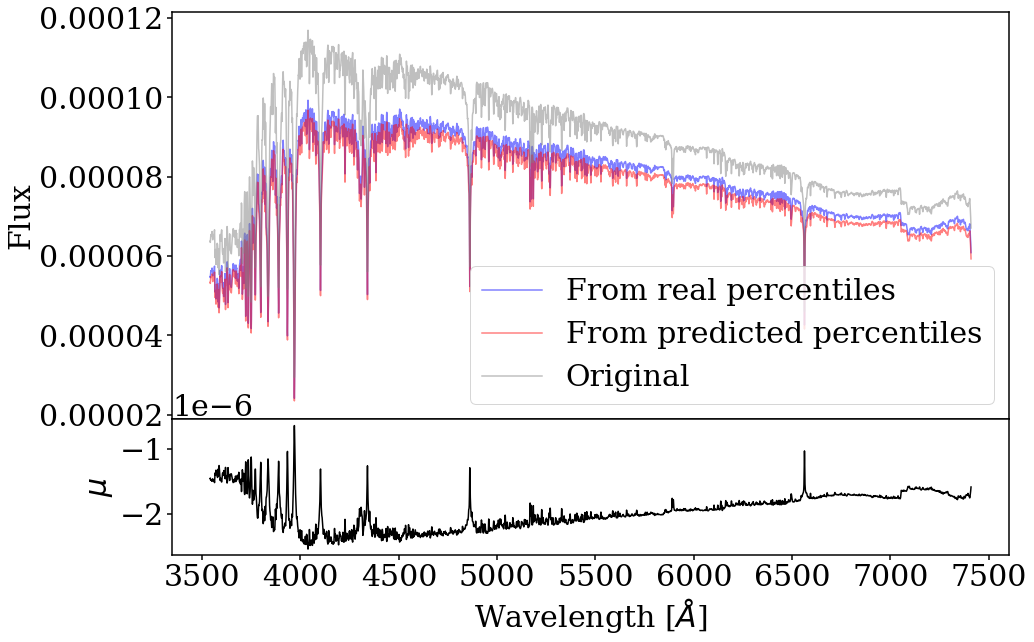

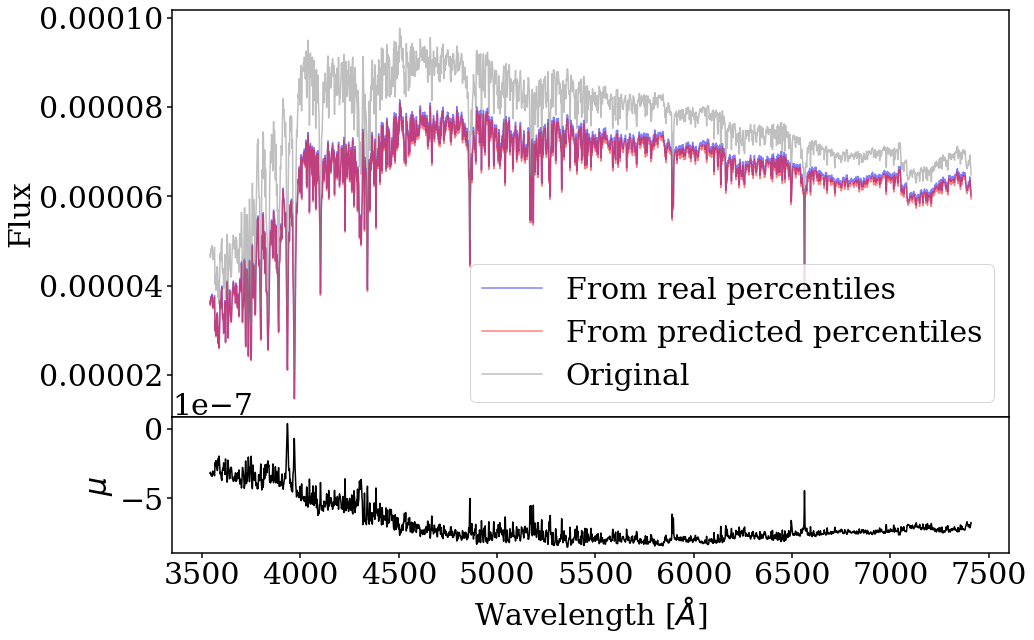

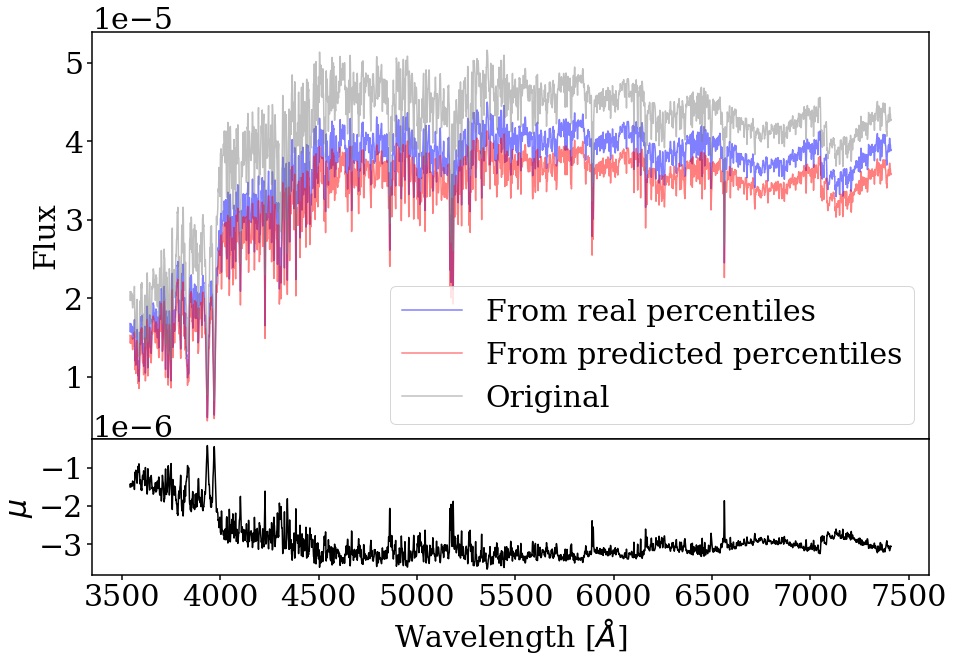

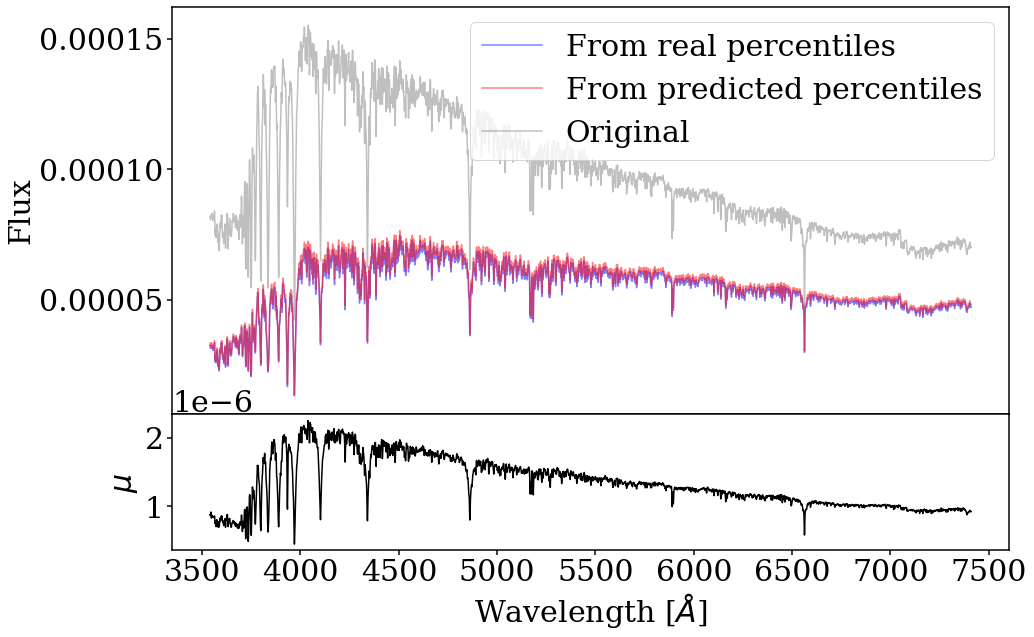

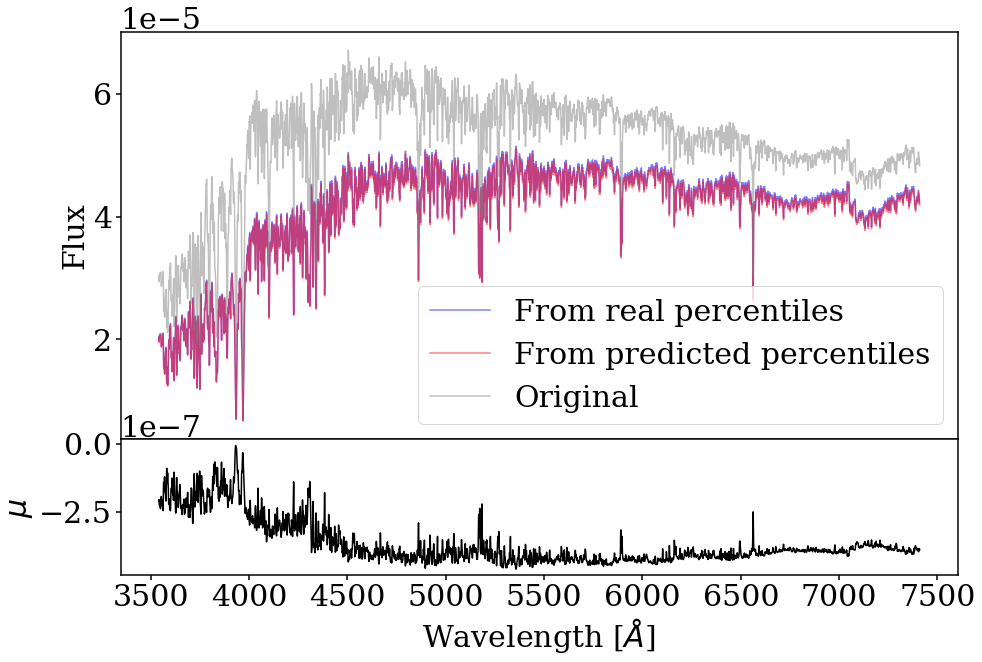

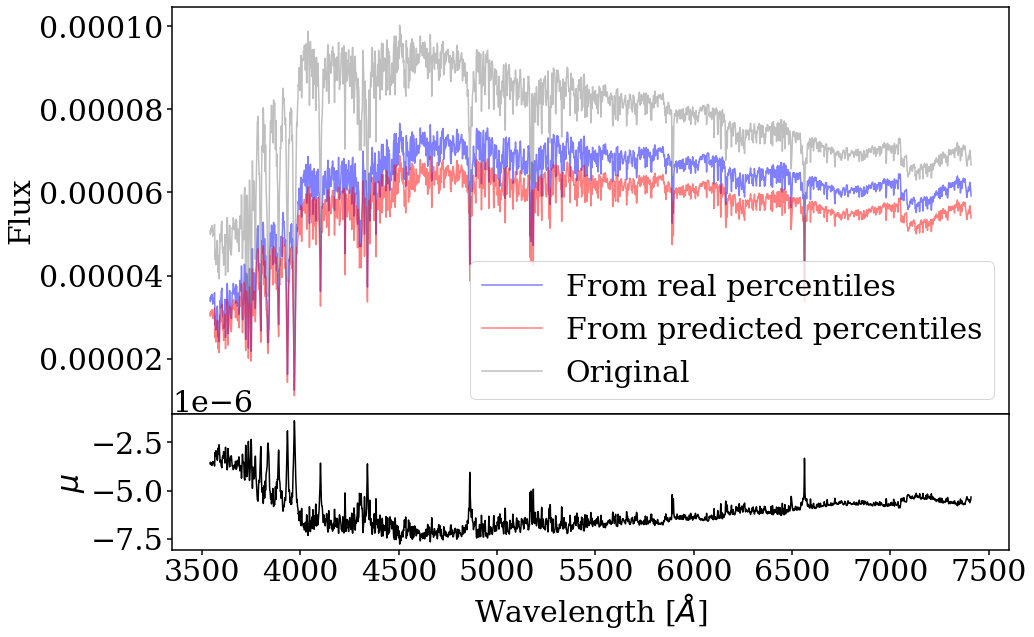

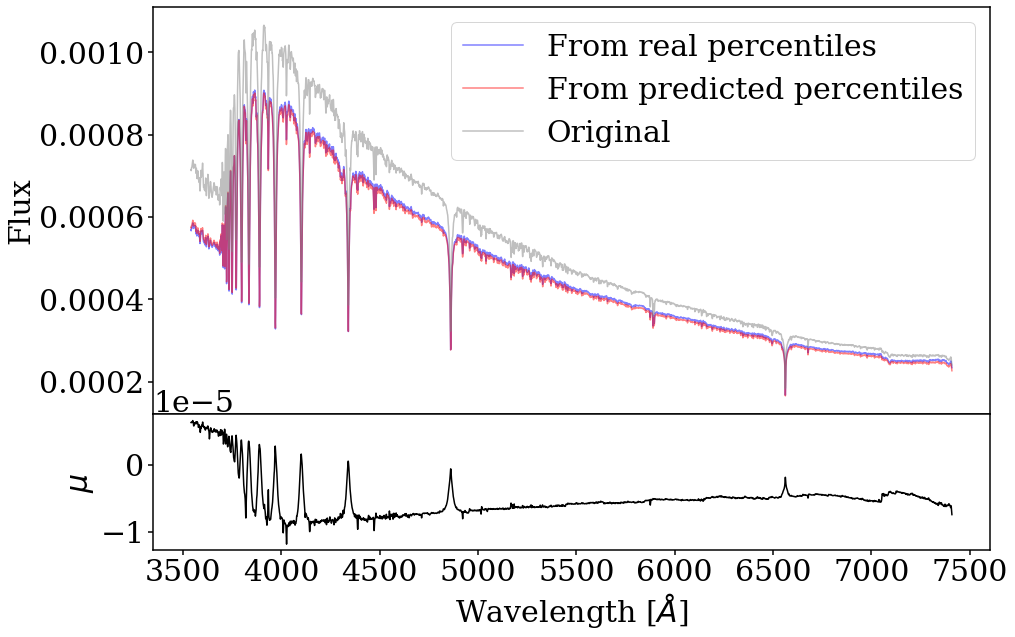

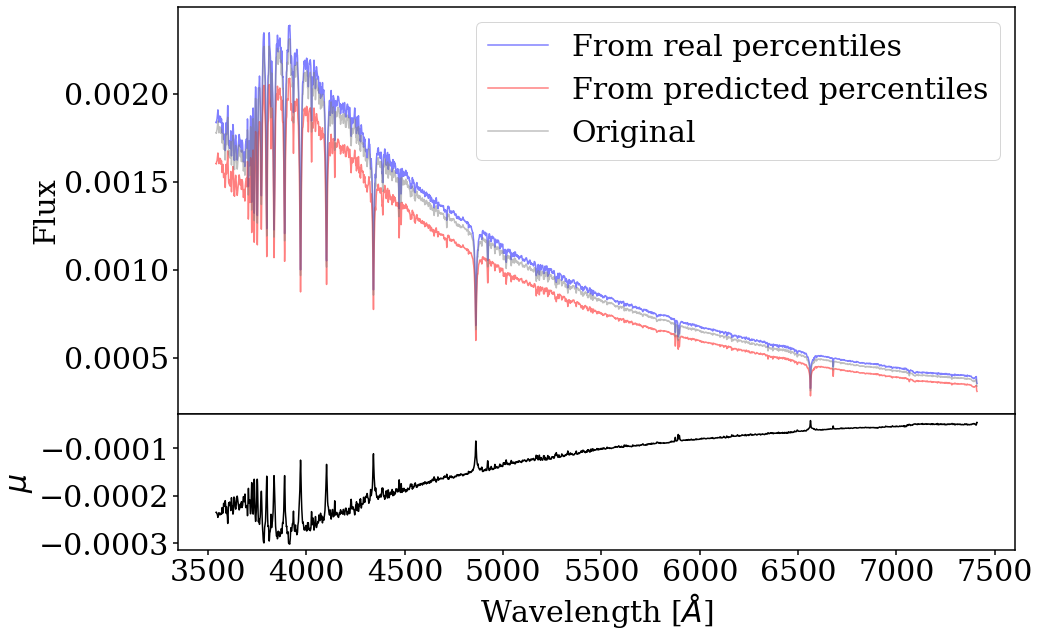

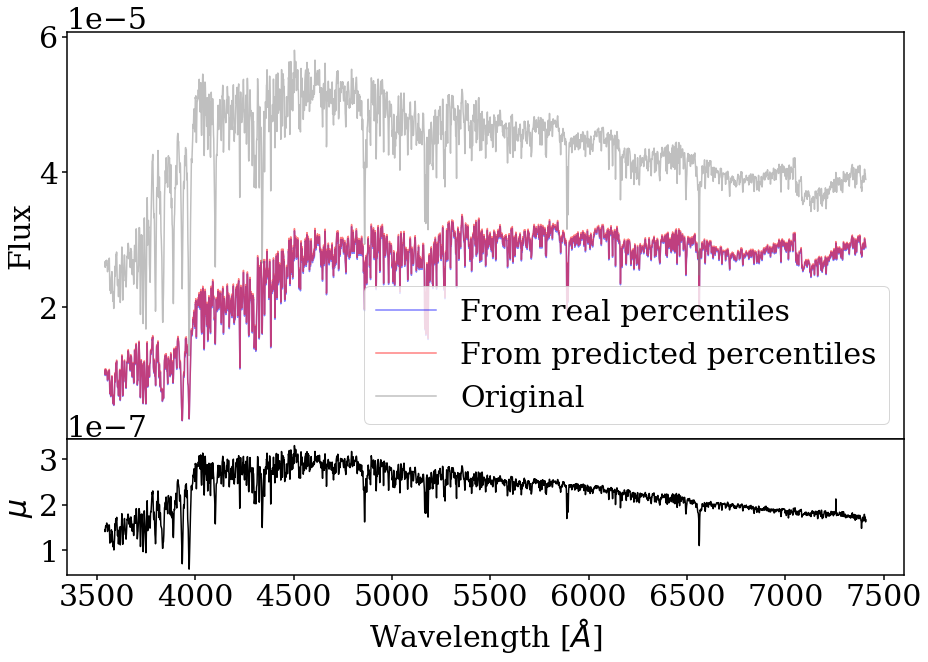

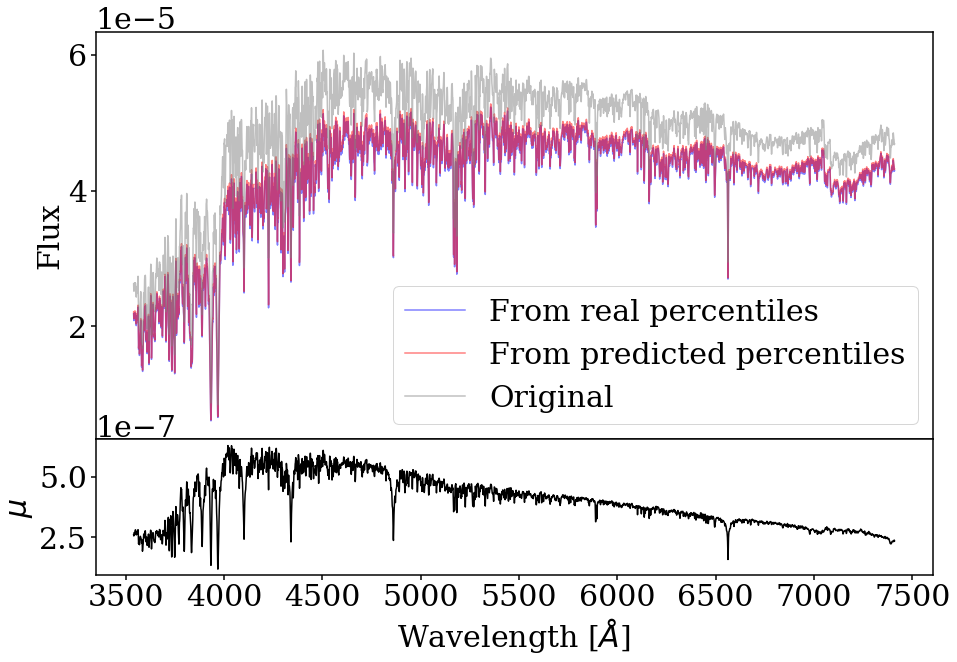

In [20]:

for i in range(10):
    fig = plt.figure()
    # set height ratios for subplots
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    # the first subplot
    ax0 = plt.subplot(gs[0])
    ax0.plot(wave, seds_from_percent[i],'b',label='From real percentiles',alpha=0.5)
    ax0.plot(wave, seds_from_percent_pred[i],'r',label='From predicted percentiles',alpha=0.5) 
    ax0.plot(wave, seds_real_sh[i,:],'grey',label='Original',alpha=0.5) 
    ax0.set_ylabel('Flux')   
    ax0.legend()
    
    ax1 = plt.subplot(gs[1], sharex = ax0)
    ax1.plot(wave,(seds_from_percent_pred[i]-seds_from_percent[i]),'k')
    ax1.set_xlabel('Wavelength [$\\AA$]')
    ax1.set_ylabel('$\\mu$')
    
    yticks = ax1.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)
    plt.subplots_adjust(hspace=.0)
    plt.setp(ax0.get_xticklabels(), visible=False)
    #if k==0:    
    #    plt.savefig('./examples/recover_spectra.jpg')
    #plt.savefig('./examples/no_norm'+str(k)+'.jpg')
    plt.show()
    


In [34]:
from sbi import utils as Ut
from sbi import inference as Inference
import pickle

latents_batch=np.load('../saved_models/latents_450000.npy',allow_pickle=True)
latents=np.zeros((450000,16))
batch_size=128

#to create a single dataset with all the minibatches
for j in range(len(latents_batch)):
    for i,x in enumerate(latents_batch[j]):
        latents[batch_size*j+i,:]=x

latents=latents[index_sh[405000:][:1000],:]

file="../saved_models/my_posterior.pkl"


file = open(file, 'rb')
qphi = pickle.load(file)
file.close()


z=y_sh[:10,-2]
alpha_fe=y_sh[:10,-1]
tbins=get_tbins(dir_name='../../MILES/MILES_BASTI_KU_baseFe',strs_1='Mku1.30Zp0.06T',strs_2='_iTp0.00_baseFe.fits')
wave,data_met_alpha=get_data_met_alpha(dir_name='../../MILES/MILES_BASTI_KU',z=z,alpha_fe=alpha_fe)

data=[]
for i in range(10):
    data.append(data_met_alpha[:,:,i,i])

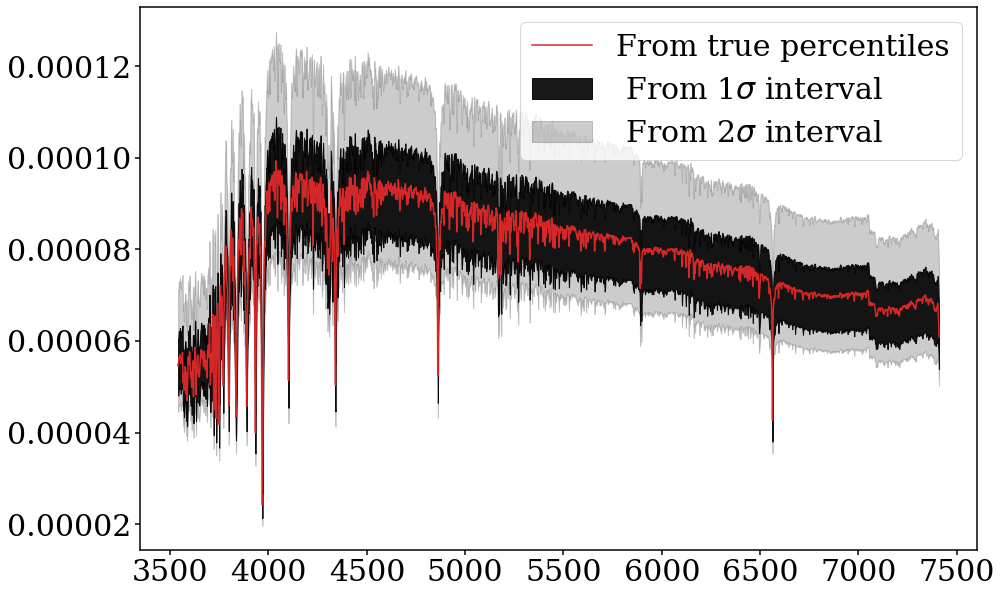

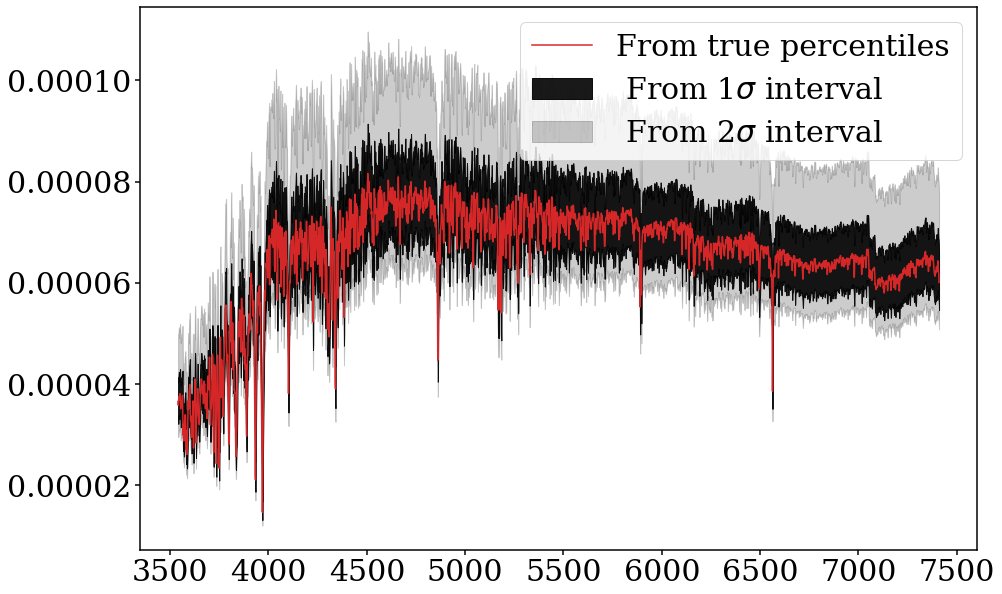

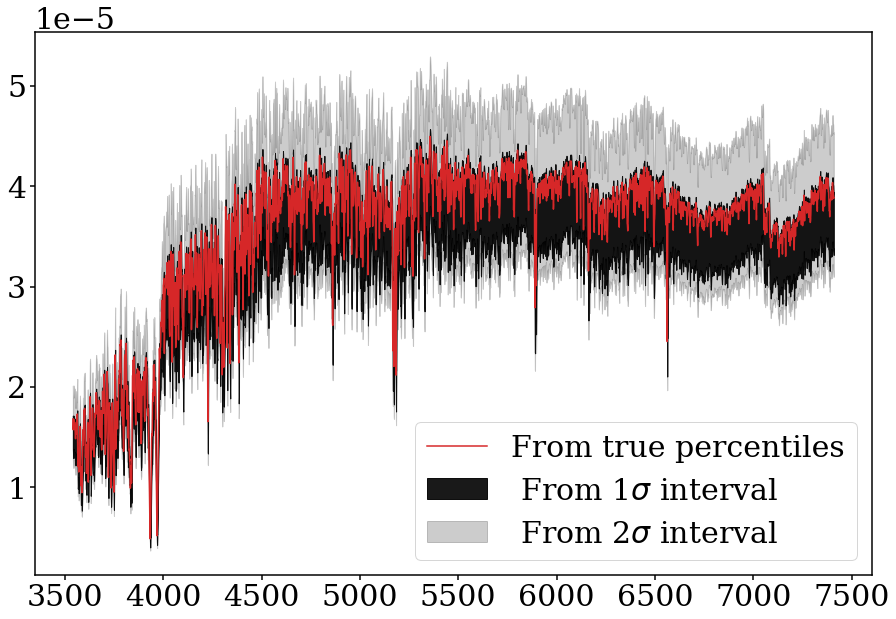

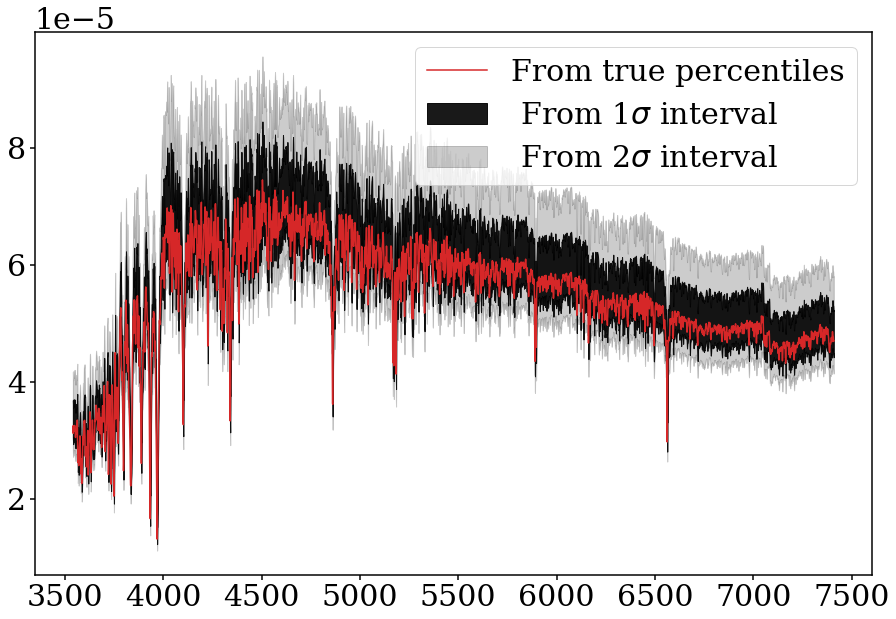

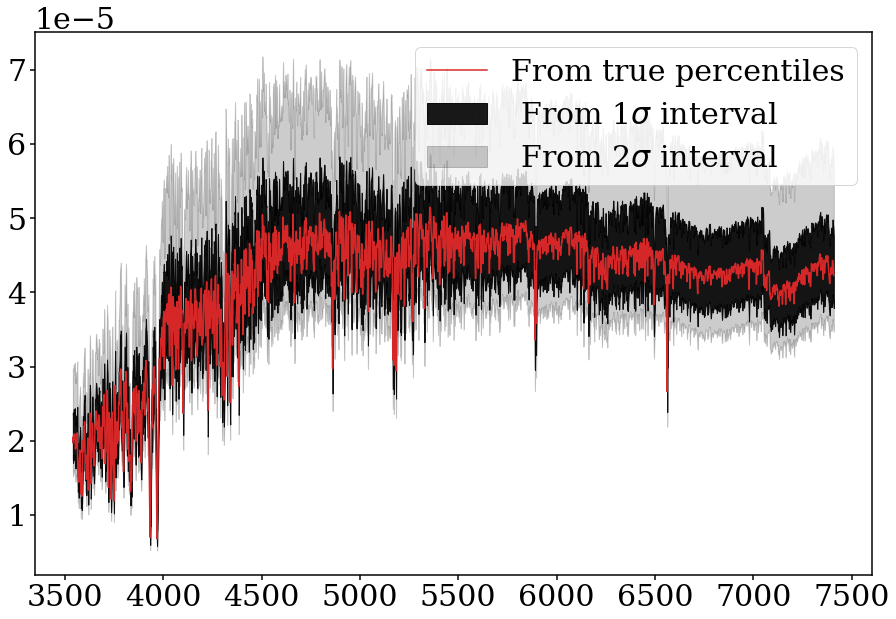

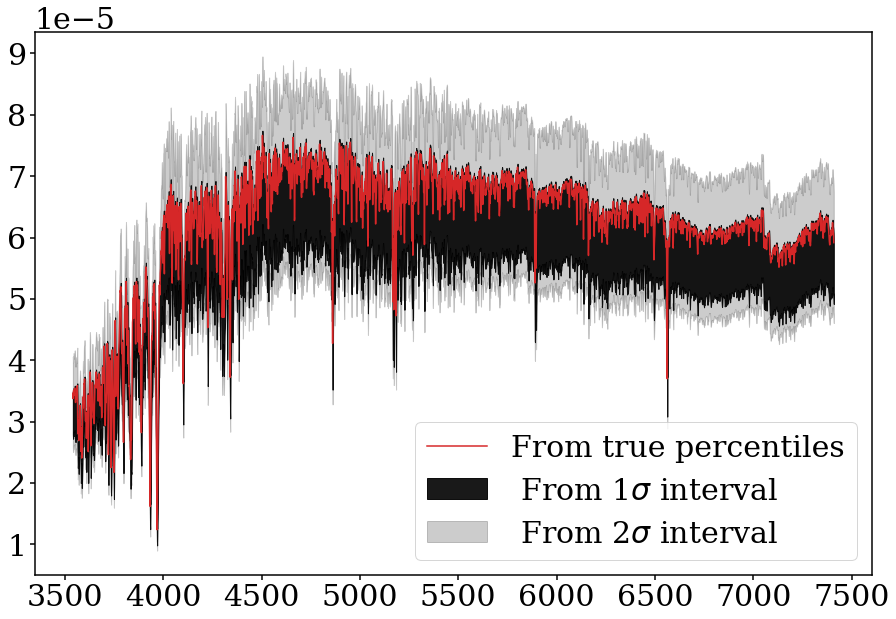

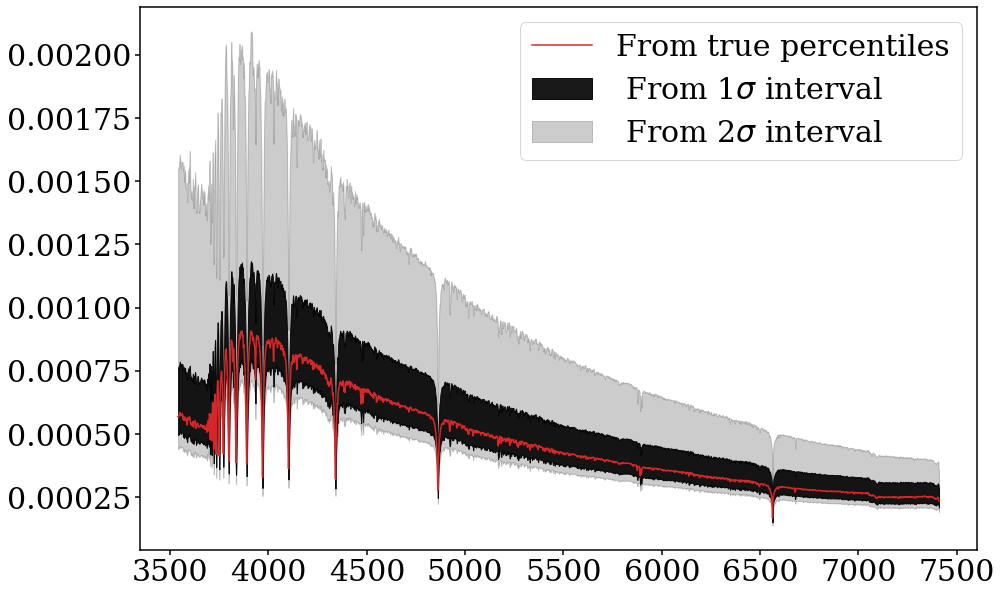

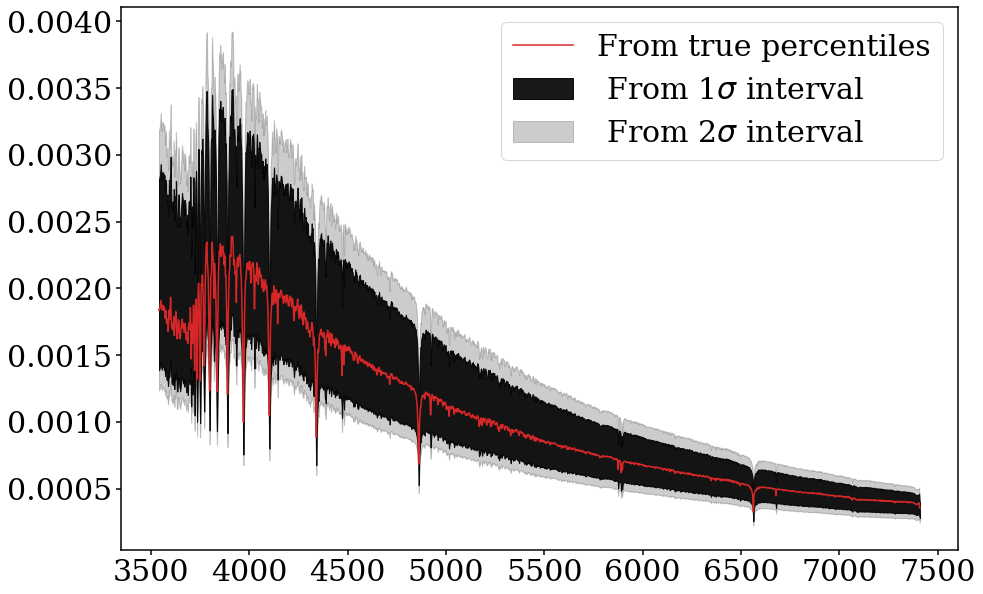

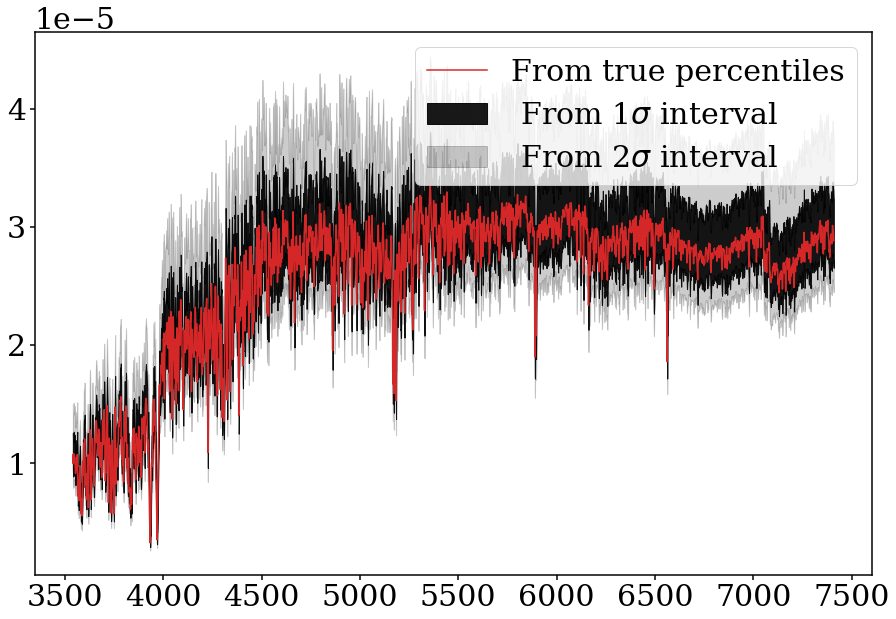

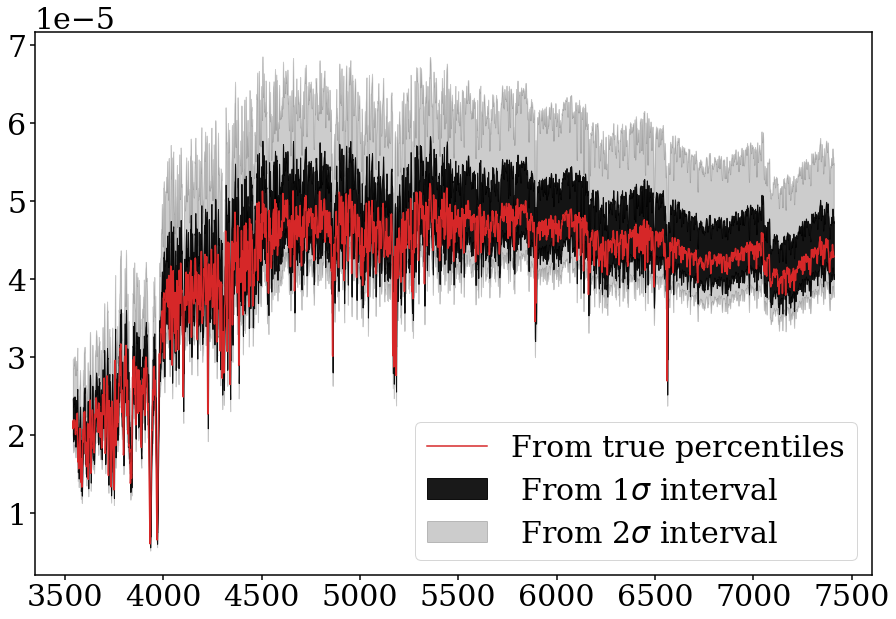

In [49]:
import torch

n_samples=20
for i in range(10):
    Xobs=latents[i,:]
    #we generate 5 predictions
    posterior_samples= np.array(qphi.sample((n_samples,),x=torch.as_tensor(np.array([Xobs]).astype(np.float32)).to('cpu'), 
    show_progress_bars=False).detach().to('cpu'))
    
    """ ms=ms_from_percentiles[i,:]
    data_extended=interpolate_t(tbins,t[-1]-y_sh[i,:9],data[i])
    spectrum=[]
    for l in range(9):  
        spectrum.append(((1/9)*data_extended[-l]))
    spectrum=np.array(spectrum)
    sed_from_percent=np.sum(spectrum,axis=0)
    
    ms=ms_from_percentiles_pred[i,:]
    data_extended=interpolate_t(tbins,t[-1]-means_sh[i,:9],data[i])
    spectrum=[]
    for l in range(9): 
        spectrum.append(((1/9)*data_extended[-l]))
    spectrum=np.array(spectrum)
    sed_from_percent_pred=np.sum(spectrum,axis=0)"""
    
    
    
   
    
    """for j in trange(n_samples):
        #ms=ms_from_percentiles_post[j]
        data_extended=interpolate_t(tbins,t[-1]-posterior_samples[j,:9],data[i])
        spectrum=[]
        for l in range(9):  
            spectrum.append(((1/9)*data_extended[-l]))
        spectrum=np.array(spectrum)
        sed_from_percent=np.sum(spectrum,axis=0)
        if j==0:
            plt.plot(wave,sed_from_percent,c='grey',label='From posterior samples')
        else:
            plt.plot(wave,sed_from_percent,c='grey')"""
    
    plt.plot(wave,seds_from_percent[i],label='From true percentiles',c='tab:red')
    #plt.plot(wave,seds_from_percent_pred[i],label='From mean predicted percentiles',c='tab:blue')
    
    #one sigma up
    per=means_sh[i,:9]+stds_sh[i,:9]
    ms_up=np.gradient(np.arange(0.1,1,0.1),per)*delta_t #unit Msun
    
    data_extended=interpolate_t(tbins,t[-1]-per,data[i])
    spectrum=[]
    for l in range(9):  
        spectrum.append(((1/9)*data_extended[-l]))
    spectrum=np.array(spectrum)
    sed_up=np.sum(spectrum,axis=0)
 
    #one sigma down
    per=means_sh[i,:9]-stds_sh[i,:9]
    ms_down=np.gradient(np.arange(0.1,1,0.1),per)*delta_t #unit Msun
    
    data_extended=interpolate_t(tbins,t[-1]-per,data[i])
    spectrum=[]
    for l in range(9):  
        spectrum.append(((1/9)*data_extended[-l]))
    spectrum=np.array(spectrum)
    sed_down=np.sum(spectrum,axis=0)
    
    
    plt.fill_between(wave, sed_down, sed_up,alpha=0.9,color='k',label=' From 1$\\sigma$ interval')
    
    #two sigma up
    per=means_sh[i,:9]+2*stds_sh[i,:9]
    ms_up=np.gradient(np.arange(0.1,1,0.1),per)*delta_t #unit Msun
    
    data_extended=interpolate_t(tbins,t[-1]-per,data[i])
    spectrum=[]
    for l in range(9):  
        spectrum.append(((1/9)*data_extended[-l]))
    spectrum=np.array(spectrum)
    sed_2up=np.sum(spectrum,axis=0)
 
    #two sigma down
    per=means_sh[i,:9]-2*stds_sh[i,:9]
    ms_down=np.gradient(np.arange(0.1,1,0.1),per)*delta_t #unit Msun
    
    data_extended=interpolate_t(tbins,t[-1]-per,data[i])
    spectrum=[]
    for l in range(9):  
        spectrum.append(((1/9)*data_extended[-l]))
    spectrum=np.array(spectrum)
    sed_2down=np.sum(spectrum,axis=0)
    
    plt.fill_between(wave, sed_2down, sed_2up,alpha=0.2,color='k',label=' From 2$\\sigma$ interval')
    
    
    
    #plt.plot(wave,seds_real_sh[i,:],'tab:green', label='Original')
    plt.legend()
    plt.show()
    